# Selección de datos. CCAA: Euskadi

In [121]:
import pandas as pd
import os
import json
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
path_combustible = "C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/"
path_estacionservicio = "C:/Users/TheBridge/Desktop/00/data/EstacionesServicio/"
path_tickets = "C:/Users/TheBridge/Desktop/00/data/Tickets/"
path_CO2 = "C:/Users/TheBridge/Desktop/00/data/EmisionesCO2/"
path_vehiculos = "C:/Users/TheBridge/Desktop/00/data/Vehiculos/"


# Combustible

In [3]:
# Rango de valores que quieres recorrer
años = [str(año) for año in range(2022, 2025)]   # 2022 a 2025
meses = [f"{i:02d}" for i in range(1, 13)]       # '01' a '12'

# Carpeta donde guardar los nuevos archivos
datos_combinados = []

# Recorremos todas las combinaciones
for año in años:
        for mes in meses:
            # Fixed path concatenation
            ruta = os.path.join(path_combustible, año, mes)
            
            if os.path.exists(ruta):
                archivos = os.listdir(ruta)
                archivos_json = [f for f in archivos if f.endswith('.json')]
                
                if archivos_json:
                    print(f"Procesando carpeta: {ruta} - {len(archivos_json)} archivos JSON")
                
                for archivo in archivos:
                    if archivo.endswith('.json'):
                        ruta_archivo = os.path.join(ruta, archivo)
                        try:
                            with open(ruta_archivo, 'r', encoding='utf-8') as f:
                                contenido = json.load(f)
                                
                                # Check if the JSON structure has 'ListaEESSPrecio' (your original format)
                                if 'ListaEESSPrecio' in contenido:
                                    fecha = contenido.get('Fecha', '')
                                    for estacion in contenido['ListaEESSPrecio']:
                                        # Create a new dictionary for each gas station
                                        nuevo = {'Fecha': fecha}  # Add the date first
                                        
                                        # Extract all fields from each station
                                        for clave, valor in estacion.items():
                                            nuevo[clave] = valor
                                        
                                        datos_combinados.append(nuevo)
                                
                                # Check if the JSON is a list of stations (alternative format)
                                elif isinstance(contenido, list):
                                    # Extract date from filename if not in content
                                    fecha_archivo = archivo.replace('.json', '')
                                    for estacion in contenido:
                                        nuevo = {'Fecha': fecha_archivo}
                                        for clave, valor in estacion.items():
                                            nuevo[clave] = valor
                                        datos_combinados.append(nuevo)
                                
                                # Check if it's a single station object
                                elif isinstance(contenido, dict) and any(key.startswith('Precio') for key in contenido.keys()):
                                    fecha_archivo = archivo.replace('.json', '')
                                    nuevo = {'Fecha': fecha_archivo}
                                    for clave, valor in contenido.items():
                                        nuevo[clave] = valor
                                    datos_combinados.append(nuevo)
                                
                                else:
                                    print(f"Formato JSON no reconocido en {ruta_archivo}")
                                    print(f"Claves encontradas: {list(contenido.keys()) if isinstance(contenido, dict) else 'No es diccionario'}")
                                        
                        except Exception as e:
                            print(f"Error leyendo {ruta_archivo}: {e}")
            # Removed the "Ruta no existe" message to reduce console output

# Convertir la lista de diccionarios en un DataFrame
if datos_combinados:
    df = pd.DataFrame(datos_combinados)
    
    # Guardar como CSV
    output_path = os.path.join(path_combustible, 'datos_combinados_combustibleEuskadi2022-2025.csv')
    df.to_csv(output_path, index=False, encoding='utf-8')
    
    print(f"Total de registros combinados: {len(datos_combinados)}")
    print(f"Archivo guardado en: {output_path}")
    print(f"Columnas en el CSV: {list(df.columns)}")
else:
    print("No se encontraron datos para procesar.")

Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\01 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\02 - 28 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\03 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\04 - 30 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\05 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\06 - 30 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\07 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/Desktop/00/data/Data_combustible_Euskadi_2021_2025/16/2022\08 - 31 archivos JSON
Procesando carpeta: C:/Users/TheBridge/D

In [4]:
df_combustible = pd.read_csv(path_combustible + "datos_combinados_combustibleEuskadi2022-2025.csv")
df_combustible.head()

C:\Users\TheBridge\AppData\Local\Temp\ipykernel_17252\399331633.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combustible = pd.read_csv(path_combustible + "datos_combinados_combustibleEuskadi2022-2025.csv")


,Fecha,C.P.,Dirección,Horario,Latitud,Localidad,Longitud (WGS84),Margen,Municipio,Precio Adblue,...,Provincia,Remisión,Rótulo,Tipo Venta,% BioEtanol,% Éster metílico,IDEESS,IDMunicipio,IDProvincia,IDCCAA
0,01/01/2022 0:00:00,1240,"CL MANISITU, 9",L-D: 24H,"42,846028",ALEGRIA-DULANTZI,"-2,509361",D,Alegría-Dulantzi,NaN,...,ARABA/ÁLAVA,dm,"PREMIRA ENERGIA NORTE, S.L.",P,"0,0","0,0",9381,1,1,16
1,01/01/2022 0:00:00,1240,"CALLE GASTEIZBIDEA, 59",L-D: 07:00-22:00,"42,842917",ALEGRIA-DULANTZI,"-2,519194",D,Alegría-Dulantzi,NaN,...,ARABA/ÁLAVA,dm,ES DULANTZI REPSOL,P,"0,0","0,0",14209,1,1,16
2,01/01/2022 0:00:00,1468,"POLIGONO ZANKUETA, 0",L-D: 24H,"43,044333",LARRINBE,"-2,989111",D,Amurrio,NaN,...,ARABA/ÁLAVA,dm,ESTACIONES GB,P,"0,0","0,0",13543,2,1,16
3,01/01/2022 0:00:00,1450,"CARRETERA A-624 KM. 37,8",L-D: 06:00-22:00,"43,031889",LEZAMA,"-2,967611",D,Amurrio,NaN,...,ARABA/ÁLAVA,dm,MOEVE,P,"0,0","0,0",45,2,1,16
4,01/01/2022 0:00:00,1474,"AVENIDA GARAY, 23",L-D: 06:00-22:00,"43,123361",ARTZINIEGA,"-3,122528",D,Artziniega,NaN,...,ARABA/ÁLAVA,dm,AVIA,P,"0,0","0,0",5,8,1,16


In [5]:
df_combustible.columns

Index(['Fecha', 'C.P.', 'Dirección', 'Horario', 'Latitud', 'Localidad',
       'Longitud (WGS84)', 'Margen', 'Municipio', 'Precio Adblue',
       'Precio Amoniaco', 'Precio Biodiesel', 'Precio Bioetanol',
       'Precio Biogas Natural Comprimido', 'Precio Biogas Natural Licuado',
       'Precio Diésel Renovable', 'Precio Gas Natural Comprimido',
       'Precio Gas Natural Licuado', 'Precio Gases licuados del petróleo',
       'Precio Gasoleo A', 'Precio Gasoleo B', 'Precio Gasoleo Premium',
       'Precio Gasolina 95 E10', 'Precio Gasolina 95 E25',
       'Precio Gasolina 95 E5', 'Precio Gasolina 95 E5 Premium',
       'Precio Gasolina 95 E85', 'Precio Gasolina 98 E10',
       'Precio Gasolina 98 E5', 'Precio Gasolina Renovable',
       'Precio Hidrogeno', 'Precio Metanol', 'Provincia', 'Remisión', 'Rótulo',
       'Tipo Venta', '% BioEtanol', '% Éster metílico', 'IDEESS',
       'IDMunicipio', 'IDProvincia', 'IDCCAA'],
      dtype='object')

In [6]:
columns = ['Dirección', 'Horario','Localidad','Margen', 'Municipio', 'Provincia', 'Remisión', 'Rótulo',
       'Tipo Venta', '% BioEtanol', '% Éster metílico', 'IDEESS',
       'IDMunicipio', 'IDProvincia', 'IDCCAA']

df_combustible_precios = df_combustible.drop(columns=columns)

df_combustible_precios.head()

,Fecha,C.P.,Latitud,Longitud (WGS84),Precio Adblue,Precio Amoniaco,Precio Biodiesel,Precio Bioetanol,Precio Biogas Natural Comprimido,Precio Biogas Natural Licuado,...,Precio Gasolina 95 E10,Precio Gasolina 95 E25,Precio Gasolina 95 E5,Precio Gasolina 95 E5 Premium,Precio Gasolina 95 E85,Precio Gasolina 98 E10,Precio Gasolina 98 E5,Precio Gasolina Renovable,Precio Hidrogeno,Precio Metanol
0,01/01/2022 0:00:00,1240,"42,846028","-2,509361",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2022 0:00:00,1240,"42,842917","-2,519194",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,559",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2022 0:00:00,1468,"43,044333","-2,989111",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,499",NaN,NaN,NaN,"1,639",NaN,NaN,NaN
3,01/01/2022 0:00:00,1450,"43,031889","-2,967611",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,559",NaN,NaN,NaN,"1,691",NaN,NaN,NaN
4,01/01/2022 0:00:00,1474,"43,123361","-3,122528",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"1,525",NaN,NaN,NaN,"1,625",NaN,NaN,NaN


In [70]:
df_combustible_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Fecha                               366746 non-null  object 
 1   C.P.                                366746 non-null  int64  
 2   Latitud                             366746 non-null  object 
 3   Longitud (WGS84)                    366746 non-null  object 
 4   Precio Adblue                       0 non-null       float64
 5   Precio Amoniaco                     0 non-null       float64
 6   Precio Biodiesel                    3738 non-null    object 
 7   Precio Bioetanol                    1449 non-null    object 
 8   Precio Biogas Natural Comprimido    0 non-null       float64
 9   Precio Biogas Natural Licuado       0 non-null       float64
 10  Precio Diésel Renovable             0 non-null       float64
 11  Precio Gas Natural Comprim

In [7]:
df_combustible_precios = df_combustible_precios.dropna(axis = 1, how='all')

df_combustible_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Fecha                               366746 non-null  object
 1   C.P.                                366746 non-null  int64 
 2   Latitud                             366746 non-null  object
 3   Longitud (WGS84)                    366746 non-null  object
 4   Precio Biodiesel                    3738 non-null    object
 5   Precio Bioetanol                    1449 non-null    object
 6   Precio Gas Natural Comprimido       10923 non-null   object
 7   Precio Gas Natural Licuado          7019 non-null    object
 8   Precio Gases licuados del petróleo  38893 non-null   object
 9   Precio Gasoleo A                    358766 non-null  object
 10  Precio Gasoleo B                    62431 non-null   object
 11  Precio Gasoleo Premium              250

In [8]:
df_combustible_precios

,Fecha,C.P.,Latitud,Longitud (WGS84),Precio Biodiesel,Precio Bioetanol,Precio Gas Natural Comprimido,Precio Gas Natural Licuado,Precio Gases licuados del petróleo,Precio Gasoleo A,Precio Gasoleo B,Precio Gasoleo Premium,Precio Gasolina 95 E5,Precio Gasolina 95 E5 Premium,Precio Gasolina 98 E5
0,01/01/2022 0:00:00,1240,"42,846028","-2,509361",NaN,NaN,NaN,NaN,NaN,"1,379","0,726",NaN,NaN,NaN,NaN
1,01/01/2022 0:00:00,1240,"42,842917","-2,519194",NaN,NaN,NaN,NaN,NaN,"1,419",NaN,NaN,"1,559",NaN,NaN
2,01/01/2022 0:00:00,1468,"43,044333","-2,989111",NaN,NaN,NaN,NaN,NaN,"1,369",NaN,"1,439","1,499",NaN,"1,639"
3,01/01/2022 0:00:00,1450,"43,031889","-2,967611",NaN,NaN,NaN,NaN,NaN,"1,429",NaN,"1,495","1,559",NaN,"1,691"
4,01/01/2022 0:00:00,1474,"43,123361","-3,122528",NaN,NaN,NaN,NaN,NaN,"1,395","0,955","1,445","1,525",NaN,"1,625"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366741,31/12/2024 0:00:00,48170,"43,276028","-2,851000",NaN,NaN,NaN,NaN,NaN,"1,369",NaN,NaN,"1,439",NaN,NaN
366742,31/12/2024 0:00:00,48170,"43,280111","-2,852861",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,489",NaN,"1,589",NaN
366743,31/12/2024 0:00:00,48170,"43,293278","-2,896722",NaN,NaN,NaN,NaN,NaN,"1,264",NaN,NaN,"1,329",NaN,NaN
366744,31/12/2024 0:00:00,48160,"43,318583","-2,876444",NaN,NaN,NaN,NaN,"0,949","1,539",NaN,NaN,"1,579",NaN,"1,729"


In [9]:
#Cambio de nombre de la columna
df_combustible_precios = df_combustible_precios.rename(columns={'Longitud (WGS84)': 'Longitud'})

# Cambio del tipo de string a float para las columnas de Latitud y Longitud
df_combustible_precios['Latitud']= df_combustible_precios['Latitud'].str.replace(',', '.').astype(float)
df_combustible_precios['Longitud']= df_combustible_precios['Longitud'].str.replace(',', '.').astype(float)

In [74]:

df_combustible_precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Fecha                               366746 non-null  object 
 1   C.P.                                366746 non-null  int64  
 2   Latitud                             366746 non-null  float64
 3   Longitud                            366746 non-null  float64
 4   Precio Biodiesel                    3738 non-null    object 
 5   Precio Bioetanol                    1449 non-null    object 
 6   Precio Gas Natural Comprimido       10923 non-null   object 
 7   Precio Gas Natural Licuado          7019 non-null    object 
 8   Precio Gases licuados del petróleo  38893 non-null   object 
 9   Precio Gasoleo A                    358766 non-null  object 
 10  Precio Gasoleo B                    62431 non-null   object 
 11  Precio Gasoleo Premium    

In [10]:
df_combustible_precios['Precio Biodiesel'] = df_combustible_precios['Precio Biodiesel'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Bioetanol'] = df_combustible_precios['Precio Bioetanol'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gas Natural Comprimido'] = df_combustible_precios['Precio Gas Natural Comprimido'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gas Natural Licuado'] = df_combustible_precios['Precio Gas Natural Licuado'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gases licuados del petróleo'] = df_combustible_precios['Precio Gases licuados del petróleo'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasoleo A'] = df_combustible_precios['Precio Gasoleo A'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasoleo B'] = df_combustible_precios['Precio Gasoleo B'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasoleo Premium'] = df_combustible_precios['Precio Gasoleo Premium'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasolina 95 E5'] = df_combustible_precios['Precio Gasolina 95 E5'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasolina 95 E5 Premium'] = df_combustible_precios['Precio Gasolina 95 E5 Premium'].str.replace(',', '.').astype(float)
df_combustible_precios['Precio Gasolina 98 E5'] = df_combustible_precios['Precio Gasolina 98 E5'].str.replace(',', '.').astype(float)

In [14]:
df_combustible_precios['Precio Biodiesel'] = df_combustible_precios['Precio Biodiesel'].fillna(df_combustible_precios['Precio Biodiesel'].mean())
df_combustible_precios['Precio Bioetanol'] = df_combustible_precios['Precio Bioetanol'].fillna(df_combustible_precios['Precio Bioetanol'].mean())
df_combustible_precios['Precio Gas Natural Comprimido'] = df_combustible_precios['Precio Gas Natural Comprimido'].fillna(df_combustible_precios['Precio Gas Natural Comprimido'].mean())
df_combustible_precios['Precio Gas Natural Licuado'] = df_combustible_precios['Precio Gas Natural Licuado'].fillna(df_combustible_precios['Precio Gas Natural Licuado'].mean())
df_combustible_precios['Precio Gases licuados del petróleo'] = df_combustible_precios['Precio Gases licuados del petróleo'].fillna(df_combustible_precios['Precio Gases licuados del petróleo'].mean())
df_combustible_precios['Precio Gasoleo A'] = df_combustible_precios['Precio Gasoleo A'].fillna(df_combustible_precios['Precio Gasoleo A'].mean())
df_combustible_precios['Precio Gasoleo B'] = df_combustible_precios['Precio Gasoleo B'].fillna(df_combustible_precios['Precio Gasoleo B'].mean())
df_combustible_precios['Precio Gasoleo Premium'] = df_combustible_precios['Precio Gasoleo Premium'].fillna(df_combustible_precios['Precio Gasoleo Premium'].mean())
df_combustible_precios['Precio Gasolina 95 E5'] = df_combustible_precios['Precio Gasolina 95 E5'].fillna(df_combustible_precios['Precio Gasolina 95 E5'].mean())
df_combustible_precios['Precio Gasolina 95 E5 Premium'] = df_combustible_precios['Precio Gasolina 95 E5 Premium'].fillna(df_combustible_precios['Precio Gasolina 95 E5 Premium'].mean())
df_combustible_precios['Precio Gasolina 98 E5'] = df_combustible_precios['Precio Gasolina 98 E5'].fillna(df_combustible_precios['Precio Gasolina 98 E5'].mean())


In [15]:
df_combustible_precios

,Fecha,C.P.,Latitud,Longitud,Precio Biodiesel,Precio Bioetanol,Precio Gas Natural Comprimido,Precio Gas Natural Licuado,Precio Gases licuados del petróleo,Precio Gasoleo A,Precio Gasoleo B,Precio Gasoleo Premium,Precio Gasolina 95 E5,Precio Gasolina 95 E5 Premium,Precio Gasolina 98 E5
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,1.791813,1.63908,1.441664,1.404936,0.95078,1.379000,0.726000,1.749672,1.699481,1.761606,1.863838
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,1.791813,1.63908,1.441664,1.404936,0.95078,1.419000,1.356982,1.749672,1.559000,1.761606,1.863838
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,1.791813,1.63908,1.441664,1.404936,0.95078,1.369000,1.356982,1.439000,1.499000,1.761606,1.639000
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,1.791813,1.63908,1.441664,1.404936,0.95078,1.429000,1.356982,1.495000,1.559000,1.761606,1.691000
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,1.791813,1.63908,1.441664,1.404936,0.95078,1.395000,0.955000,1.445000,1.525000,1.761606,1.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366741,31/12/2024 0:00:00,48170,43.276028,-2.851000,1.791813,1.63908,1.441664,1.404936,0.95078,1.369000,1.356982,1.749672,1.439000,1.761606,1.863838
366742,31/12/2024 0:00:00,48170,43.280111,-2.852861,1.791813,1.63908,1.441664,1.404936,0.95078,1.645545,1.356982,1.489000,1.699481,1.589000,1.863838
366743,31/12/2024 0:00:00,48170,43.293278,-2.896722,1.791813,1.63908,1.441664,1.404936,0.95078,1.264000,1.356982,1.749672,1.329000,1.761606,1.863838
366744,31/12/2024 0:00:00,48160,43.318583,-2.876444,1.791813,1.63908,1.441664,1.404936,0.94900,1.539000,1.356982,1.749672,1.579000,1.761606,1.729000


In [23]:

# Extraer nombres de columnas de carburantes
carburante_cols = []
for col in df_combustible_precios.columns:
    if col.startswith('Precio'):
        carburante_cols.append(col)

# Crear un DataFrame con identificador
df_carburantes_id = pd.DataFrame({
    'id_carburante': range(1, len(carburante_cols) + 1),
    'nombre_carburante': carburante_cols
})




In [24]:
df_long = df_combustible_precios.melt(
    id_vars=[col for col in df_combustible_precios.columns if col not in carburante_cols],
    value_vars=carburante_cols,
    var_name='nombre_carburante',
    value_name='precio'
)
df_long = df_long.merge(df_carburantes_id, on='nombre_carburante')

df_long.head()


,Fecha,C.P.,Latitud,Longitud,nombre_carburante,precio,id_carburante
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,Precio Biodiesel,1.791813,1
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,Precio Biodiesel,1.791813,1
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,Precio Biodiesel,1.791813,1
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,Precio Biodiesel,1.791813,1
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,Precio Biodiesel,1.791813,1


In [25]:
#Eliminar la palabra precio de los nombres de carburantes
df_long['nombre_carburante'] = df_long['nombre_carburante'].str.replace('Precio ', '').astype(str)

df_long


,Fecha,C.P.,Latitud,Longitud,nombre_carburante,precio,id_carburante
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,Biodiesel,1.791813,1
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,Biodiesel,1.791813,1
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,Biodiesel,1.791813,1
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,Biodiesel,1.791813,1
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,Biodiesel,1.791813,1
...,...,...,...,...,...,...,...
4034201,31/12/2024 0:00:00,48170,43.276028,-2.851000,Gasolina 98 E5,1.863838,11
4034202,31/12/2024 0:00:00,48170,43.280111,-2.852861,Gasolina 98 E5,1.863838,11
4034203,31/12/2024 0:00:00,48170,43.293278,-2.896722,Gasolina 98 E5,1.863838,11
4034204,31/12/2024 0:00:00,48160,43.318583,-2.876444,Gasolina 98 E5,1.729000,11


In [28]:
df_long['nombre_carburante'].unique()

array(['Biodiesel', 'Bioetanol', 'Gas Natural Comprimido',
       'Gas Natural Licuado', 'Gases licuados del petróleo', 'Gasoleo A',
       'Gasoleo B', 'Gasoleo Premium', 'Gasolina 95 E5',
       'Gasolina 95 E5 Premium', 'Gasolina 98 E5'], dtype=object)

In [29]:
#Añadir columna de energia por unidad (kWh/L)
df_long['energia_kWh'] = df_long['nombre_carburante'].map({
    'Biodiesel': 9.2,
    'Bioetanol': 5.9,
    'Gas Natural Comprimido': 13.1,
    'Gas Natural Licuado': 13.9,
    'Gases licuados del petróleo': 6.9,
    'Gasoleo A': 10.2,
    'Gasoleo B': 10.2,
    'Gasoleo Premium': 10.2,
    'Gasolina 95 E5': 9.25,
    'Gasolina 95 E5 Premium': 9.25,
    'Gasolina 98 E5': 9.25
})


In [30]:
df_long

,Fecha,C.P.,Latitud,Longitud,nombre_carburante,precio,id_carburante,energia_kWh
0,01/01/2022 0:00:00,1240,42.846028,-2.509361,Biodiesel,1.791813,1,9.20
1,01/01/2022 0:00:00,1240,42.842917,-2.519194,Biodiesel,1.791813,1,9.20
2,01/01/2022 0:00:00,1468,43.044333,-2.989111,Biodiesel,1.791813,1,9.20
3,01/01/2022 0:00:00,1450,43.031889,-2.967611,Biodiesel,1.791813,1,9.20
4,01/01/2022 0:00:00,1474,43.123361,-3.122528,Biodiesel,1.791813,1,9.20
...,...,...,...,...,...,...,...,...
4034201,31/12/2024 0:00:00,48170,43.276028,-2.851000,Gasolina 98 E5,1.863838,11,9.25
4034202,31/12/2024 0:00:00,48170,43.280111,-2.852861,Gasolina 98 E5,1.863838,11,9.25
4034203,31/12/2024 0:00:00,48170,43.293278,-2.896722,Gasolina 98 E5,1.863838,11,9.25
4034204,31/12/2024 0:00:00,48160,43.318583,-2.876444,Gasolina 98 E5,1.729000,11,9.25


In [31]:
df_long.to_csv(path_combustible + "df_combustible_precios_euskadi_2022-2025.csv")

# Estacion de Servicio 

In [41]:
df_estaciones_servicio = pd.read_csv(path_estacionservicio + 'EstacionesDeServicio#.csv', encoding='utf-8', sep='|', decimal=',')
df_estaciones_servicio.columns


Index(['Id', 'Rotulo', 'Operador', 'Direccion', 'Margen', 'CodPostal', 'CCAA',
       'Provincia', 'Municipio', 'Localidad', 'CoordenadaX', 'CoordenadaXDec',
       'CoordenadaY', 'CoordenadaYDec', 'FechaPvp', 'HoraPvp', 'TipoVenta',
       'Remision', 'Horario', 'TipoServicio', 'PorcentajeBioetanol',
       'PorcentajeBioalcohol'],
      dtype='object')

In [42]:
df_estaciones_servicio_v2= df_estaciones_servicio.drop(columns=['Id','Operador', 'Margen', 'CoordenadaX', 'CoordenadaY', 'TipoVenta', 'Remision', 'TipoServicio', 'PorcentajeBioetanol', 'PorcentajeBioalcohol'])

In [43]:
filter= df_estaciones_servicio_v2['CCAA'] ==  'Pa#s Vasco'

euskadi_ES = df_estaciones_servicio_v2[filter]

euskadi_ES.head()

,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,CoordenadaXDec,CoordenadaYDec,FechaPvp,HoraPvp,Horario
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00


In [44]:
euskadi_ES = euskadi_ES.rename(columns={'CoordenadaXDec': 'Longitud', 'CoordenadaYDec': 'Latitud'})
euskadi_ES['Latitud']= euskadi_ES['Latitud'].astype(float)
euskadi_ES['Longitud']= euskadi_ES['Longitud'].astype(float)

In [45]:
euskadi_ES

,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,Longitud,Latitud,FechaPvp,HoraPvp,Horario
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00
...,...,...,...,...,...,...,...,...,...,...,...,...
11684,PETROPRIX,CALLE ANTXITURRI 1,20570,Pa#s Vasco,GIPUZKOA,Bergara,BERGARA,-2.422500,43.126389,19/09/2025,18:28,L-D: 07:00-22:00
11727,EUSKADI LOW COST,CALLE BO SORAVILLA 998,20140,Pa#s Vasco,GIPUZKOA,Andoain,ANDOAIN,-2.021194,43.218639,17/09/2025,12:19,L-D: 24H
11765,NAFTE,CALLE RETUERTO 42,48903,Pa#s Vasco,BIZKAIA,Barakaldo,SAN VICENTE DE BARAKALDO,-3.002750,43.286667,16/09/2025,11:29,L-D: 24H
11830,AVIA,CARRETERA NACIONAL N-1 (IRUN-MADRID) KM. 417,20212,Pa#s Vasco,GIPUZKOA,Olaberria,OLABERRIA,-2.216667,43.038889,17/09/2025,07:41,L-D: 24H


In [46]:
#Creando la columnas coordenadas mediante la concatenacion de las columnas latitud y longitud
euskadi_ES['coordenadas'] = list(zip(euskadi_ES['Latitud'], euskadi_ES['Longitud']))
euskadi_ES.head()


,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,Longitud,Latitud,FechaPvp,HoraPvp,Horario,coordenadas
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H,"(43.323611, -1.879944)"
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H,"(42.865278, -2.661139)"
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00,"(43.307222, -3.078528)"
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00,"(43.170556, -2.597556)"
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00,"(43.281972, -1.916778)"


In [47]:
#Por cada coordenada obtener un id unico
euskadi_ES['id_ES'] = euskadi_ES['coordenadas'].factorize()[0] + 1
euskadi_ES.head()

,Rotulo,Direccion,CodPostal,CCAA,Provincia,Municipio,Localidad,Longitud,Latitud,FechaPvp,HoraPvp,Horario,coordenadas,id_ES
63,MERKAOIL,IPINTZA KALEA 47,20100,Pa#s Vasco,GIPUZKOA,Lezo,LEZO,-1.879944,43.323611,15/09/2025,09:08,L-D: 24H,"(43.323611, -1.879944)",1
102,ONAINDIA LOWCOST,CALLE PORTAL DE GAMARRA 7,1013,Pa#s Vasco,ARABA/#LAVA,Vitoria-Gasteiz,VITORIA-GASTEIZ,-2.661139,42.865278,16/09/2025,11:16,L-D: 24H,"(42.865278, -2.661139)",2
106,E.S.EL CAMPILLO,POL.IND. EL CAMPILLO PARC. 1-2 FASE II,48500,Pa#s Vasco,BIZKAIA,Abanto y Ci#rvana-Abanto Zierbena,ABANTO,-3.078528,43.307222,19/09/2025,13:21,L-V: 06:00-22:00 S: 08:00-15:00,"(43.307222, -3.078528)",3
141,EUSKOIL-STAR PETROLEUM,CTRA.FORAL BI-633 km 323,48220,Pa#s Vasco,BIZKAIA,Abadi#o,ABADI#O-ZELAIETA,-2.597556,43.170556,19/09/2025,15:00,L: 07:00-22:00,"(43.170556, -2.597556)",4
142,ONROAD 24,CARRETERA GI-2132 ASTIGARRAGA-OIARTZUN KM. 10,20115,Pa#s Vasco,GIPUZKOA,Astigarraga,ASTIGARRAGA,-1.916778,43.281972,15/09/2025,08:59,L-V: 06:00-22:00 S: 07:00-22:00 D: 08:00-22:00,"(43.281972, -1.916778)",5


In [48]:
euskadi_ES.to_csv(path_estacionservicio+ "estaciones_servicio_euskadi.csv", index=False)

# Generacion de Tickets

Columnas:
+ Cantidad en Litros
+ Tipo de combustible
+ Precio por Litro
+ Fecha
+ Hora 
+ Latitud 
+ Longitud
+ $ \text{Importe} = \text{PrecioLitros} \times \text{CantidadLitros} $

In [77]:
Fecha = df_combustible_precios['Fecha']
Latitud = df_combustible_precios['Latitud']
Longitud = df_combustible_precios['Longitud']

In [78]:
coordenadas = list(zip(Latitud, Longitud))
coordenadas


[(42.846028, -2.509361),
 (42.842917, -2.519194),
 (43.044333, -2.989111),
 (43.031889, -2.967611),
 (43.123361, -3.122528),
 (42.876861, -2.616361),
 (42.870861, -2.312056),
 (42.866417, -2.278694),
 (42.670222, -2.357278),
 (42.878556, -2.518167),
 (42.635194, -2.849833),
 (42.547639, -2.578806),
 (43.148639, -2.951361),
 (43.138, -2.968),
 (42.753194, -2.477917),
 (42.490611, -2.432278),
 (42.743111, -2.913306),
 (42.741361, -2.913222),
 (42.704639, -2.917639),
 (42.692917, -2.920667),
 (42.710639, -2.906944),
 (42.848944, -2.394583),
 (42.852694, -2.379083),
 (42.8635, -2.320361),
 (42.863583, -2.324083),
 (42.871167, -2.314083),
 (42.849778, -2.648306),
 (42.836778, -2.698917),
 (42.837111, -2.700972),
 (42.842833, -2.682278),
 (42.864944, -2.7105),
 (42.854694, -2.708611),
 (42.857194, -2.716389),
 (42.863778, -2.712722),
 (42.852417, -2.709972),
 (42.849028, -2.693722),
 (42.857667, -2.717833),
 (42.836667, -2.66),
 (42.837083, -2.657611),
 (42.838722, -2.6645),
 (42.836833, -2.

In [79]:
df_combustible_precios.columns

Index(['Fecha', 'C.P.', 'Latitud', 'Longitud', 'Precio Biodiesel',
       'Precio Bioetanol', 'Precio Gas Natural Comprimido',
       'Precio Gas Natural Licuado', 'Precio Gases licuados del petróleo',
       'Precio Gasoleo A', 'Precio Gasoleo B', 'Precio Gasoleo Premium',
       'Precio Gasolina 95 E5', 'Precio Gasolina 95 E5 Premium',
       'Precio Gasolina 98 E5'],
      dtype='object')

In [80]:
df_long.columns

Index(['Fecha', 'C.P.', 'Latitud', 'Longitud', 'nombre_carburante', 'precio',
       'id_carburante', 'energia_kWh'],
      dtype='object')

In [81]:
Carburantes = df_long.drop(columns =['Fecha', 'C.P.', 'Latitud', 'Longitud'])
Carburantes

,nombre_carburante,precio,id_carburante,energia_kWh
0,Biodiesel,1.791813,1,9.20
1,Biodiesel,1.791813,1,9.20
2,Biodiesel,1.791813,1,9.20
3,Biodiesel,1.791813,1,9.20
4,Biodiesel,1.791813,1,9.20
...,...,...,...,...
4034201,Gasolina 98 E5,1.863838,11,9.25
4034202,Gasolina 98 E5,1.863838,11,9.25
4034203,Gasolina 98 E5,1.863838,11,9.25
4034204,Gasolina 98 E5,1.729000,11,9.25


In [82]:
#Creamos un dataframe de tickets con datos aleatorios de fechas, PrecioCarburantes y coordenadas
num_tickets = len(Fecha) #Nº de tickets será igual a la cantidad de fechas que tenemos


tickets = pd.DataFrame({
    'Fecha': random.choices(Fecha.tolist(), k=num_tickets),
    'TipoCarburante': random.choices(Carburantes['nombre_carburante'].tolist(), k=num_tickets),
    'Precio por Litro': random.choices(Carburantes['precio'].tolist(), k=num_tickets),
    'Coordenadas': random.choices(coordenadas, k=num_tickets)
})

In [83]:
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas
0,02/03/2023 0:00:00,Gasoleo A,1.639080,"(43.278472, -1.98425)"
1,16/05/2024 0:00:00,Gasolina 95 E5 Premium,1.629000,"(43.316139, -1.905194)"
2,23/06/2022 0:00:00,Gas Natural Licuado,1.761606,"(43.250667, -2.889028)"
3,21/02/2023 0:00:00,Gases licuados del petróleo,1.639080,"(43.340861, -1.756528)"
4,30/01/2022 0:00:00,Gasoleo A,1.789000,"(43.0655, -2.711167)"
...,...,...,...,...
366741,27/10/2024 0:00:00,Gasolina 95 E5 Premium,1.269000,"(43.284889, -2.264111)"
366742,25/10/2022 0:00:00,Gas Natural Licuado,1.639080,"(42.871806, -2.675944)"
366743,13/05/2022 0:00:00,Gasoleo B,1.356982,"(43.362194, -3.100528)"
366744,17/07/2022 0:00:00,Gasolina 95 E5 Premium,1.479000,"(43.087111, -2.312889)"


In [84]:
# Añadir id_carburante a tickets según el nombre del carburante
id_map = df_long[['nombre_carburante', 'id_carburante']].drop_duplicates()
tickets = tickets.merge(id_map, left_on='TipoCarburante', right_on='nombre_carburante', how='left')
tickets 

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante
0,02/03/2023 0:00:00,Gasoleo A,1.639080,"(43.278472, -1.98425)",Gasoleo A,6
1,16/05/2024 0:00:00,Gasolina 95 E5 Premium,1.629000,"(43.316139, -1.905194)",Gasolina 95 E5 Premium,10
2,23/06/2022 0:00:00,Gas Natural Licuado,1.761606,"(43.250667, -2.889028)",Gas Natural Licuado,4
3,21/02/2023 0:00:00,Gases licuados del petróleo,1.639080,"(43.340861, -1.756528)",Gases licuados del petróleo,5
4,30/01/2022 0:00:00,Gasoleo A,1.789000,"(43.0655, -2.711167)",Gasoleo A,6
...,...,...,...,...,...,...
366741,27/10/2024 0:00:00,Gasolina 95 E5 Premium,1.269000,"(43.284889, -2.264111)",Gasolina 95 E5 Premium,10
366742,25/10/2022 0:00:00,Gas Natural Licuado,1.639080,"(42.871806, -2.675944)",Gas Natural Licuado,4
366743,13/05/2022 0:00:00,Gasoleo B,1.356982,"(43.362194, -3.100528)",Gasoleo B,7
366744,17/07/2022 0:00:00,Gasolina 95 E5 Premium,1.479000,"(43.087111, -2.312889)",Gasolina 95 E5 Premium,10


In [93]:
#Lo mimso para id de estacion de servicio
id_map_es = euskadi_ES[['coordenadas', 'id_ES']].drop_duplicates()
tickets = tickets.merge(id_map_es, left_on='Coordenadas', right_on='coordenadas', how='left')
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,Litros,Importe,Latitud,Longitud,coordenadas,id_ES
0,02/03/2023 0:00:00,Gasoleo A,1.639080,"(43.278472, -1.98425)",Gasoleo A,6,970,1589.907654,43.278472,-1.984250,"(43.278472, -1.98425)",296.0
1,16/05/2024 0:00:00,Gasolina 95 E5 Premium,1.629000,"(43.316139, -1.905194)",Gasolina 95 E5 Premium,10,1390,2264.310000,43.316139,-1.905194,"(43.316139, -1.905194)",67.0
2,23/06/2022 0:00:00,Gas Natural Licuado,1.761606,"(43.250667, -2.889028)",Gas Natural Licuado,4,1100,1937.766858,43.250667,-2.889028,"(43.250667, -2.889028)",186.0
3,21/02/2023 0:00:00,Gases licuados del petróleo,1.639080,"(43.340861, -1.756528)",Gases licuados del petróleo,5,930,1524.344451,43.340861,-1.756528,"(43.340861, -1.756528)",332.0
4,30/01/2022 0:00:00,Gasoleo A,1.789000,"(43.0655, -2.711167)",Gasoleo A,6,790,1413.310000,43.065500,-2.711167,"(43.0655, -2.711167)",312.0
...,...,...,...,...,...,...,...,...,...,...,...,...
366741,27/10/2024 0:00:00,Gasolina 95 E5 Premium,1.269000,"(43.284889, -2.264111)",Gasolina 95 E5 Premium,10,1200,1522.800000,43.284889,-2.264111,"(43.284889, -2.264111)",340.0
366742,25/10/2022 0:00:00,Gas Natural Licuado,1.639080,"(42.871806, -2.675944)",Gas Natural Licuado,4,860,1409.608847,42.871806,-2.675944,"(42.871806, -2.675944)",316.0
366743,13/05/2022 0:00:00,Gasoleo B,1.356982,"(43.362194, -3.100528)",Gasoleo B,7,500,678.490926,43.362194,-3.100528,"(43.362194, -3.100528)",238.0
366744,17/07/2022 0:00:00,Gasolina 95 E5 Premium,1.479000,"(43.087111, -2.312889)",Gasolina 95 E5 Premium,10,930,1375.470000,43.087111,-2.312889,"(43.087111, -2.312889)",70.0


In [94]:
# Variable Litros
#Un coche por estimacion aprox puede repostar hasta los 100 L
#Un bus por estimacion aproz reposta entre 80 y 1500L
litros= []


for i in range(len(tickets.index)):
    litros.append(random.choice(range(10, 1501, 10)))

tickets['Litros'] = litros

In [95]:
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,Litros,Importe,Latitud,Longitud,coordenadas,id_ES
0,02/03/2023 0:00:00,Gasoleo A,1.639080,"(43.278472, -1.98425)",Gasoleo A,6,60,1589.907654,43.278472,-1.984250,"(43.278472, -1.98425)",296.0
1,16/05/2024 0:00:00,Gasolina 95 E5 Premium,1.629000,"(43.316139, -1.905194)",Gasolina 95 E5 Premium,10,1280,2264.310000,43.316139,-1.905194,"(43.316139, -1.905194)",67.0
2,23/06/2022 0:00:00,Gas Natural Licuado,1.761606,"(43.250667, -2.889028)",Gas Natural Licuado,4,1010,1937.766858,43.250667,-2.889028,"(43.250667, -2.889028)",186.0
3,21/02/2023 0:00:00,Gases licuados del petróleo,1.639080,"(43.340861, -1.756528)",Gases licuados del petróleo,5,580,1524.344451,43.340861,-1.756528,"(43.340861, -1.756528)",332.0
4,30/01/2022 0:00:00,Gasoleo A,1.789000,"(43.0655, -2.711167)",Gasoleo A,6,1090,1413.310000,43.065500,-2.711167,"(43.0655, -2.711167)",312.0
...,...,...,...,...,...,...,...,...,...,...,...,...
366741,27/10/2024 0:00:00,Gasolina 95 E5 Premium,1.269000,"(43.284889, -2.264111)",Gasolina 95 E5 Premium,10,350,1522.800000,43.284889,-2.264111,"(43.284889, -2.264111)",340.0
366742,25/10/2022 0:00:00,Gas Natural Licuado,1.639080,"(42.871806, -2.675944)",Gas Natural Licuado,4,170,1409.608847,42.871806,-2.675944,"(42.871806, -2.675944)",316.0
366743,13/05/2022 0:00:00,Gasoleo B,1.356982,"(43.362194, -3.100528)",Gasoleo B,7,760,678.490926,43.362194,-3.100528,"(43.362194, -3.100528)",238.0
366744,17/07/2022 0:00:00,Gasolina 95 E5 Premium,1.479000,"(43.087111, -2.312889)",Gasolina 95 E5 Premium,10,1010,1375.470000,43.087111,-2.312889,"(43.087111, -2.312889)",70.0


In [96]:
#Calculo del importe
tickets['Importe'] = tickets['Litros'] * tickets['Precio por Litro'].astype(float)


In [98]:
tickets= tickets.drop(columns=[ 'coordenadas'])
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,Litros,Importe,Latitud,Longitud,id_ES
0,02/03/2023 0:00:00,Gasoleo A,1.639080,"(43.278472, -1.98425)",Gasoleo A,6,60,98.344803,43.278472,-1.984250,296.0
1,16/05/2024 0:00:00,Gasolina 95 E5 Premium,1.629000,"(43.316139, -1.905194)",Gasolina 95 E5 Premium,10,1280,2085.120000,43.316139,-1.905194,67.0
2,23/06/2022 0:00:00,Gas Natural Licuado,1.761606,"(43.250667, -2.889028)",Gas Natural Licuado,4,1010,1779.222297,43.250667,-2.889028,186.0
3,21/02/2023 0:00:00,Gases licuados del petróleo,1.639080,"(43.340861, -1.756528)",Gases licuados del petróleo,5,580,950.666432,43.340861,-1.756528,332.0
4,30/01/2022 0:00:00,Gasoleo A,1.789000,"(43.0655, -2.711167)",Gasoleo A,6,1090,1950.010000,43.065500,-2.711167,312.0
...,...,...,...,...,...,...,...,...,...,...,...
366741,27/10/2024 0:00:00,Gasolina 95 E5 Premium,1.269000,"(43.284889, -2.264111)",Gasolina 95 E5 Premium,10,350,444.150000,43.284889,-2.264111,340.0
366742,25/10/2022 0:00:00,Gas Natural Licuado,1.639080,"(42.871806, -2.675944)",Gas Natural Licuado,4,170,278.643609,42.871806,-2.675944,316.0
366743,13/05/2022 0:00:00,Gasoleo B,1.356982,"(43.362194, -3.100528)",Gasoleo B,7,760,1031.306207,43.362194,-3.100528,238.0
366744,17/07/2022 0:00:00,Gasolina 95 E5 Premium,1.479000,"(43.087111, -2.312889)",Gasolina 95 E5 Premium,10,1010,1493.790000,43.087111,-2.312889,70.0


In [91]:
#Separo las columnas de coordenadas en latitud y longitud
tickets[['Latitud', 'Longitud']] = pd.DataFrame(tickets['Coordenadas'].tolist(), index=tickets.index)
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366746 entries, 0 to 366745
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Fecha              366746 non-null  object 
 1   TipoCarburante     366746 non-null  object 
 2   Precio por Litro   366746 non-null  float64
 3   Coordenadas        366746 non-null  object 
 4   nombre_carburante  366746 non-null  object 
 5   id_carburante      366746 non-null  int64  
 6   Litros             366746 non-null  int64  
 7   Importe            366746 non-null  float64
 8   Latitud            366746 non-null  float64
 9   Longitud           366746 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 28.0+ MB


In [92]:
tickets.head()

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,Litros,Importe,Latitud,Longitud
0,02/03/2023 0:00:00,Gasoleo A,1.639080,"(43.278472, -1.98425)",Gasoleo A,6,970,1589.907654,43.278472,-1.984250
1,16/05/2024 0:00:00,Gasolina 95 E5 Premium,1.629000,"(43.316139, -1.905194)",Gasolina 95 E5 Premium,10,1390,2264.310000,43.316139,-1.905194
2,23/06/2022 0:00:00,Gas Natural Licuado,1.761606,"(43.250667, -2.889028)",Gas Natural Licuado,4,1100,1937.766858,43.250667,-2.889028
3,21/02/2023 0:00:00,Gases licuados del petróleo,1.639080,"(43.340861, -1.756528)",Gases licuados del petróleo,5,930,1524.344451,43.340861,-1.756528
4,30/01/2022 0:00:00,Gasoleo A,1.789000,"(43.0655, -2.711167)",Gasoleo A,6,790,1413.310000,43.065500,-2.711167


In [100]:
tickets.to_csv(path_tickets + "tickets_combustible_euskadi_2022-2025.csv", index=False)

# Emisiones de CO2

In [108]:
df_CO2 = pd.read_csv(path_CO2 + 'CO2_idaehistorico.csv', sep=',', decimal=',', encoding='utf-8')
df_CO2.head()

,Fecha_alta,Fecha_actualizacion,Fecha_comercializacion,Marca,Modelo,Vehiculo,Segmento,Motorizacion,Categoria,MTMA,Consumo_NEDC,Emisiones_NEDC,Consumo_Mixto_WLTP_Min,Consumo_Mixto_WLTP_Max,Consumo_Mixto_WLTP,Emisionies_CO2_Mixto_WLTP_Min,Emisionies_CO2_Mixto_WLTP_Max,Autonomia_electrica,Consumo_Electrico,Observaciones
0,07/10/2020,07/10/2020,NaN,Abarth,595,ABARTH 595 1.4 16v T-JET 107 KW (145 CV) E6D,Minis,Gasolina,M1,1045.0,7.3,163.5,7.2,7.4,7.3,151.0,153.0,0.0,0,0
1,01/08/2018,01/08/2018,NaN,Abarth,595,ABARTH 595 1.4 16v T-JET 107 KW (145 CV) E6D,Minis,Gasóleo,M1,905.0,7.4,163,7.2,7.6,7.4,134.0,139.0,0.0,0,0
2,07/10/2020,07/10/2020,NaN,Abarth,595,ABARTH 595 COMPETIZIONE 1.4 16v T-JET 132 KW (...,Minis,Gasolina,M1,1065.0,7.75,171.5,7.7,7.8,7.75,153.0,155.0,0.0,0,0
3,07/10/2020,07/10/2020,NaN,Abarth,595,ABARTH 595 ESSEESSE 1.4 16v T-JET 132 KW (180 ...,Minis,Gasolina,M1,1065.0,7.75,171.5,7.7,7.8,7.75,153.0,155.0,0.0,0,0
4,07/10/2020,07/10/2020,NaN,Abarth,595,ABARTH 595 MONSTER ENERGY YAMAHA 1.4 16v T-JET...,Minis,Gasolina,M1,1065.0,7.45,166.5,7.4,7.5,7.45,149.0,155.0,0.0,0,0


In [109]:
df_CO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100324 entries, 0 to 100323
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Fecha_alta                     100324 non-null  object 
 1   Fecha_actualizacion            100323 non-null  object 
 2   Fecha_comercializacion         4766 non-null    object 
 3   Marca                          100324 non-null  object 
 4   Modelo                         100324 non-null  object 
 5   Vehiculo                       100166 non-null  object 
 6   Segmento                       100324 non-null  object 
 7   Motorizacion                   100324 non-null  object 
 8   Categoria                      100252 non-null  object 
 9   MTMA                           100322 non-null  float64
 10  Consumo_NEDC                   51149 non-null   object 
 11  Emisiones_NEDC                 51149 non-null   object 
 12  Consumo_Mixto_WLTP_Min        

In [110]:
df_CO2['Fecha_alta'] = pd.to_datetime(df_CO2['Fecha_alta'], format='%d/%m/%Y')

In [111]:
df_CO2['Fecha_alta'].min()

Timestamp('1992-01-01 00:00:00')

In [112]:
df_CO2['Fecha_alta'].max()

Timestamp('2025-07-30 00:00:00')

In [113]:
#Seleccion de fechas de 2020 a 2025
mask = (df_CO2['Fecha_alta'] >= '2020-01-01') & (df_CO2['Fecha_alta'] <= '2025-12-31')
df_CO2_filtered = df_CO2.loc[mask]
df_CO2_filtered

,Fecha_alta,Fecha_actualizacion,Fecha_comercializacion,Marca,Modelo,Vehiculo,Segmento,Motorizacion,Categoria,MTMA,Consumo_NEDC,Emisiones_NEDC,Consumo_Mixto_WLTP_Min,Consumo_Mixto_WLTP_Max,Consumo_Mixto_WLTP,Emisionies_CO2_Mixto_WLTP_Min,Emisionies_CO2_Mixto_WLTP_Max,Autonomia_electrica,Consumo_Electrico,Observaciones
0,2020-10-07,07/10/2020,NaN,Abarth,595,ABARTH 595 1.4 16v T-JET 107 KW (145 CV) E6D,Minis,Gasolina,M1,1045.0,7.3,163.5,7.2,7.4,7.3,151.0,153.0,0.0,0,0
2,2020-10-07,07/10/2020,NaN,Abarth,595,ABARTH 595 COMPETIZIONE 1.4 16v T-JET 132 KW (...,Minis,Gasolina,M1,1065.0,7.75,171.5,7.7,7.8,7.75,153.0,155.0,0.0,0,0
3,2020-10-07,07/10/2020,NaN,Abarth,595,ABARTH 595 ESSEESSE 1.4 16v T-JET 132 KW (180 ...,Minis,Gasolina,M1,1065.0,7.75,171.5,7.7,7.8,7.75,153.0,155.0,0.0,0,0
4,2020-10-07,07/10/2020,NaN,Abarth,595,ABARTH 595 MONSTER ENERGY YAMAHA 1.4 16v T-JET...,Minis,Gasolina,M1,1065.0,7.45,166.5,7.4,7.5,7.45,149.0,155.0,0.0,0,0
5,2020-10-07,07/10/2020,NaN,Abarth,595,ABARTH 595 PISTA 1.4 16v T-JET 121 kW (165 CV)...,Minis,Gasolina,M1,1065.0,7.45,166.5,7.4,7.5,7.45,149.0,155.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100319,2020-06-01,19/07/2024,NaN,ZHIDOU,d2s,1,Minis,Eléctricos puros,M1,1000.0,0,0,0,0,0,0.0,0.0,212.0,16.2,0
100320,2020-03-01,19/07/2024,NaN,ZHIDOU,d2s,5 ZD7150EV-A,Cuadriciclo de Pasajeros,Eléctricos puros,L7e,891.0,0,0,0,0,0,0.0,0.0,257.0,11.1,0
100321,2020-06-01,01/06/2020,NaN,ZHIDOU,d2,0,Minis,Eléctricos puros,M1,1000.0,0,0,0,0,0,0.0,0.0,120.0,148.2,0
100322,2020-12-01,01/12/2020,NaN,ZNEN,E-CRUZER (Rodea),MD80C,Motocicleta,Eléctricos puros,L3e,259.0,0,0,0,0,0,0.0,0.0,107.0,3.3,0


In [114]:
df_CO2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26681 entries, 0 to 100323
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha_alta                     26681 non-null  datetime64[ns]
 1   Fecha_actualizacion            26681 non-null  object        
 2   Fecha_comercializacion         4678 non-null   object        
 3   Marca                          26681 non-null  object        
 4   Modelo                         26681 non-null  object        
 5   Vehiculo                       26563 non-null  object        
 6   Segmento                       26681 non-null  object        
 7   Motorizacion                   26681 non-null  object        
 8   Categoria                      26681 non-null  object        
 9   MTMA                           26679 non-null  float64       
 10  Consumo_NEDC                   26680 non-null  object        
 11  Emisiones_NEDC     

In [115]:
df_CO2_filtered.to_csv(path_CO2 + "CO2_idaehistorico_2020-2025.csv", index=False)

# Vehiculos

In [53]:
df_vehiculos = pd.read_csv(path_vehiculos + 'coches_procesado.csv', sep=';', decimal=',', encoding='utf-8')
df_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida
2,0002 AAA,"LEVC VN5 Business, City, Ultima",Sin clasificación,0.9,0.9,21.0,21.0,Autonomía extendida
3,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida
4,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida
...,...,...,...,...,...,...,...,...
22198,2198 AAC,RAMPINI CARLO SPA HYDRON 2 puertas 175 kWh,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible
22199,2199 AAC,Solaris Urbino 12 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible
22200,2200 AAC,Solaris Urbino 18 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible
22201,2201 AAC,Toyota MIRAI Llanta 17p (MY19),Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible


In [54]:
df_vehiculos['Modelo'].unique()

array(['Leapmotor C10 REEV 158kW-20,5kWh', 'LEVC TX Icon, Vista',
       'LEVC VN5 Business, City, Ultima', ...,
       'Solaris Urbino 18 hydrogen Electric',
       'Toyota MIRAI Llanta 17p (MY19)',
       'Toyota MIRAI Vision/Luxury (MY21)'], shape=(21333,), dtype=object)

In [55]:
import re

# Extrae los valores mínimo y máximo de kW
def extraer_kw_min_max(modelo):
    # Busca dos valores separados por '-' y posibles espacios, con coma o punto decimal
    match = re.search(r'(\d+[.,]?\d*)\s*kW\s*-\s*(\d+[.,]?\d*)\s*kW', modelo)
    if match:
        kw1 = float(match.group(1).replace(',', '.'))
        kw2 = float(match.group(2).replace(',', '.'))
        return pd.Series({'kw_minimo': min(kw1, kw2), 'kw_maximo': max(kw1, kw2)})
    else:
        # Busca un solo valor
        match = re.search(r'(\d+[.,]?\d*)\s*kW', modelo)
        if match:
            kw = float(match.group(1).replace(',', '.'))
            return pd.Series({'kw_minimo': kw, 'kw_maximo': kw})
    return pd.Series({'kw_minimo': None, 'kw_maximo': None})

df_vehiculos[['kw_minimo', 'kw_maximo']] = df_vehiculos['Modelo'].apply(extraer_kw_min_max)
df_vehiculos[['Modelo', 'kw_minimo', 'kw_maximo']]

,Modelo,kw_minimo,kw_maximo
0,"Leapmotor C10 REEV 158kW-20,5kWh",20.5,158.0
1,"LEVC TX Icon, Vista",NaN,NaN
2,"LEVC VN5 Business, City, Ultima",NaN,NaN
3,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,152.0,152.0
4,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,152.0,152.0
...,...,...,...
22198,RAMPINI CARLO SPA HYDRON 2 puertas 175 kWh,175.0,175.0
22199,Solaris Urbino 12 hydrogen Electric,NaN,NaN
22200,Solaris Urbino 18 hydrogen Electric,NaN,NaN
22201,Toyota MIRAI Llanta 17p (MY19),NaN,NaN


In [56]:
df_vehiculos.columns

Index(['Matricula', 'Modelo', 'Clasificación Energética', ' Consumo MIN',
       ' Consumo MAX', ' Emisiones MIN (gCO2/km)', ' Emisiones MAX (gCO2/km)',
       ' Motorización', 'kw_minimo', 'kw_maximo'],
      dtype='object')

In [58]:
df_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida,NaN,NaN
2,0002 AAA,"LEVC VN5 Business, City, Ultima",Sin clasificación,0.9,0.9,21.0,21.0,Autonomía extendida,NaN,NaN
3,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
4,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
22198,2198 AAC,RAMPINI CARLO SPA HYDRON 2 puertas 175 kWh,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,175.0,175.0
22199,2199 AAC,Solaris Urbino 12 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,NaN,NaN
22200,2200 AAC,Solaris Urbino 18 hydrogen Electric,Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,NaN,NaN
22201,2201 AAC,Toyota MIRAI Llanta 17p (MY19),Sin clasificación,NaN,NaN,NaN,NaN,Pila de combustible,NaN,NaN


In [64]:
#Eliminar vehiculos cuya clasificacion energetica sea igual a Sin Clasificación Energética
df_vehiculos = df_vehiculos[df_vehiculos['Clasificación Energética'] != 'Sin clasificación']

In [65]:
df_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida,NaN,NaN
3,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
4,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
5,0005 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
22191,2191 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Core, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
22192,2192 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Plus, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
22193,2193 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Ultimate, ...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
22194,2194 AAC,"Volvo XC90 Recharge, AWD, Inscription, Inscrip...",A,3.3,2.5,57.0,75.7,Híbridos enchufables,NaN,NaN


In [68]:
df_vehiculos.to_csv(path_vehiculos + "df_vehiculos_procesado_kw.csv", index=False)

# GENERACION DE GRÁFICOS Y MODELOS

In [163]:
path = "C:/Users/TheBridge/Desktop/00/data/data_finalreto/"

# Graficas Dashboard Administrador

In [233]:
#Rutas
rutas = pd.read_csv(path + "rutas.csv")
rutas

,matricula,polyline,paradas,total_km,fecha_inicio,fecha_fin,tiempo_total,tiempos_paradas,kms_paradas
0,0000 AAA,}`egGjcgLo@hNkDEmBkFzAoVd@sKfA{j@jLeTj[_BwEws@...,"[(43.2847886, -2.1715792), (43.318237, -1.9817...",151.203,2025-09-24 20:24:11,2025-09-24 22:39:59,2:15:48,"[1529, 2169, 2932, 722, 796]","[21.17, 39.911, 69.923, 10.933, 9.266]"
1,0001 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAgRozB~b@jNhfAlF|pAf...,"[(43.2714126, -2.0499419), (42.9762852, -2.166...",265.391,2025-09-24 20:24:12,2025-09-25 00:41:22,4:17:10,"[2697, 3798, 4173, 2664, 1102, 996]","[48.889, 73.709, 79.704, 39.321, 6.73, 17.038]"
2,0002 AAA,mwpdGxbiOrDah@aKtAg@DFxAqPpc@qL|ByKfBRnB|Gvh@g...,"[(42.8531869, -2.673249), (43.3783101, -2.9938...",272.005,2025-09-24 20:24:12,2025-09-25 00:11:55,3:47:43,"[3789, 902, 4721, 538, 2312, 1401]","[83.121, 9.469, 105.3, 4.551, 48.924, 20.64]"
3,0003 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAi[oiBc]xIoVrBgM{OpN...,"[(43.2714126, -2.0499419), (43.1826563, -2.266...",230.309,2025-09-24 20:24:13,2025-09-24 23:31:15,3:07:02,"[2132, 3674, 3545, 1871]","[41.159, 79.762, 68.125, 41.263]"
4,0004 AAA,{c}gGnknOms@`i@{Apo@hKvSjCp~@iQp^kLxBxElp@zHzp...,"[(43.4081383, -2.7002367), (43.3622706, -3.012...",213.039,2025-09-24 20:24:14,2025-09-24 23:05:42,2:41:28,"[2647, 4203, 2838]","[47.032, 102.964, 63.043]"
...,...,...,...,...,...,...,...,...,...
495,0495 AAA,miwgGxvgQrJmNjJvUbSbc@l]dJl^qEbqAac@pVmMzO|Vxu...,"[(43.3783101, -2.9938881), (43.3638933, -2.504...",213.836,2025-09-24 20:30:47,2025-09-24 23:57:15,3:26:28,"[3975, 2315, 882, 2631, 1166, 1419]","[80.835, 34.618, 9.611, 53.71, 21.259, 13.803]"
496,0496 AAA,svoeG`jsLzm@tEwPpHcg@_F{c@iCm_@oSaIy}@ei@{Pc[s...,"[(43.0117763, -2.2340926), (43.0269266, -2.203...",195.440,2025-09-24 20:30:48,2025-09-24 23:19:40,2:48:52,"[520, 305, 2315, 4150, 2070, 772]","[7.617, 2.447, 44.906, 90.356, 38.727, 11.387]"
497,0497 AAA,miwgGxvgQrJmNjJvU`BfS`PzNl]dJl^qEbqAac@pVmMzO|...,"[(43.3783101, -2.9938881), (43.3182395, -3.021...",178.190,2025-09-24 20:30:49,2025-09-24 23:14:45,2:43:56,"[1115, 3915, 2375, 652, 1779]","[20.301, 80.724, 31.189, 10.222, 35.754]"
498,0498 AAA,kvseGf~gNeKcEgAgHsC`Gyn@oC_r@ar@sOgMuP`Bw_@}Cg...,"[(43.0322234, -2.5035605), (43.1258691, -2.423...",217.017,2025-09-24 20:30:50,2025-09-24 23:16:53,2:46:03,"[1006, 2875, 4676, 1406]","[15.979, 67.566, 108.159, 25.313]"


In [234]:
rutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   matricula        500 non-null    object 
 1   polyline         500 non-null    object 
 2   paradas          500 non-null    object 
 3   total_km         500 non-null    float64
 4   fecha_inicio     500 non-null    object 
 5   fecha_fin        500 non-null    object 
 6   tiempo_total     500 non-null    object 
 7   tiempos_paradas  500 non-null    object 
 8   kms_paradas      500 non-null    object 
dtypes: float64(1), object(8)
memory usage: 35.3+ KB


In [244]:
rutas['tiempo_total'] = pd.to_datetime(rutas['tiempo_total'], format="%H:%M:%S")
rutas['horas_totales'] = rutas['tiempo_total'].dt.hour + rutas['tiempo_total'].dt.minute / 60 + rutas['tiempo_total'].dt.second / 3600

In [169]:
rutas['user_label'] = ['user' + str(i+1) for i in range(len(rutas))]

In [228]:
usuarios = pd.read_csv(path + "usuarios.csv")
usuarios

,Id_usuario,usuario,contraseña,email,nombre,apellido,role
0,1,conductor01,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
1,2,conductor02,Analop02Zanalopez@gmail.com,Ana,López,conductor,NaN
2,3,conductor03,JoseMa03Z,josemartinez@hotmail.com,José,Martínez,conductor
3,4,conductor04,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
4,5,conductor05,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor
5,6,conductor06,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
6,7,conductor07,Javier07Z,javiergo78@email.com,Javier,Gómez,conductor
7,8,conductor08,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
8,9,conductor09,Manuel09H,conductor09@email.com,Manuel,Hernández,conductor
9,10,conductor10,Elena10M,elenamoreno@email.com,Elena,Moreno,conductor


In [230]:
conductores = usuarios[usuarios['usuario'].str.startswith('conductor')]
conductores

,Id_usuario,usuario,contraseña,email,nombre,apellido,role
0,1,conductor01,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
1,2,conductor02,Analop02Zanalopez@gmail.com,Ana,López,conductor,NaN
2,3,conductor03,JoseMa03Z,josemartinez@hotmail.com,José,Martínez,conductor
3,4,conductor04,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
4,5,conductor05,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor
5,6,conductor06,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
6,7,conductor07,Javier07Z,javiergo78@email.com,Javier,Gómez,conductor
7,8,conductor08,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
8,9,conductor09,Manuel09H,conductor09@email.com,Manuel,Hernández,conductor
9,10,conductor10,Elena10M,elenamoreno@email.com,Elena,Moreno,conductor


In [ ]:
conductores_lista = conductores['usuario'].tolist()
rutas['usuario'] = random.choices(conductores_lista, k=len(rutas))

In [245]:

rutas_users = pd.merge(rutas, conductores, on='usuario', how='inner')
rutas_users

,matricula,polyline,paradas,total_km,fecha_inicio,fecha_fin,tiempo_total,tiempos_paradas,kms_paradas,usuario,horas_totales,Id_usuario,contraseña,email,nombre,apellido,role
0,0000 AAA,}`egGjcgLo@hNkDEmBkFzAoVd@sKfA{j@jLeTj[_BwEws@...,"[(43.2847886, -2.1715792), (43.318237, -1.9817...",151.203,2025-09-24 20:24:11,2025-09-24 22:39:59,1900-01-01 02:15:48,"[1529, 2169, 2932, 722, 796]","[21.17, 39.911, 69.923, 10.933, 9.266]",conductor10,2.263333,10,Elena10M,elenamoreno@email.com,Elena,Moreno,conductor
1,0001 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAgRozB~b@jNhfAlF|pAf...,"[(43.2714126, -2.0499419), (42.9762852, -2.166...",265.391,2025-09-24 20:24:12,2025-09-25 00:41:22,1900-01-01 04:17:10,"[2697, 3798, 4173, 2664, 1102, 996]","[48.889, 73.709, 79.704, 39.321, 6.73, 17.038]",conductor01,4.286111,1,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
2,0002 AAA,mwpdGxbiOrDah@aKtAg@DFxAqPpc@qL|ByKfBRnB|Gvh@g...,"[(42.8531869, -2.673249), (43.3783101, -2.9938...",272.005,2025-09-24 20:24:12,2025-09-25 00:11:55,1900-01-01 03:47:43,"[3789, 902, 4721, 538, 2312, 1401]","[83.121, 9.469, 105.3, 4.551, 48.924, 20.64]",conductor06,3.795278,6,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
3,0003 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAi[oiBc]xIoVrBgM{OpN...,"[(43.2714126, -2.0499419), (43.1826563, -2.266...",230.309,2025-09-24 20:24:13,2025-09-24 23:31:15,1900-01-01 03:07:02,"[2132, 3674, 3545, 1871]","[41.159, 79.762, 68.125, 41.263]",conductor05,3.117222,5,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor
4,0004 AAA,{c}gGnknOms@`i@{Apo@hKvSjCp~@iQp^kLxBxElp@zHzp...,"[(43.4081383, -2.7002367), (43.3622706, -3.012...",213.039,2025-09-24 20:24:14,2025-09-24 23:05:42,1900-01-01 02:41:28,"[2647, 4203, 2838]","[47.032, 102.964, 63.043]",conductor06,2.691111,6,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0495 AAA,miwgGxvgQrJmNjJvUbSbc@l]dJl^qEbqAac@pVmMzO|Vxu...,"[(43.3783101, -2.9938881), (43.3638933, -2.504...",213.836,2025-09-24 20:30:47,2025-09-24 23:57:15,1900-01-01 03:26:28,"[3975, 2315, 882, 2631, 1166, 1419]","[80.835, 34.618, 9.611, 53.71, 21.259, 13.803]",conductor08,3.441111,8,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
496,0496 AAA,svoeG`jsLzm@tEwPpHcg@_F{c@iCm_@oSaIy}@ei@{Pc[s...,"[(43.0117763, -2.2340926), (43.0269266, -2.203...",195.440,2025-09-24 20:30:48,2025-09-24 23:19:40,1900-01-01 02:48:52,"[520, 305, 2315, 4150, 2070, 772]","[7.617, 2.447, 44.906, 90.356, 38.727, 11.387]",conductor09,2.814444,9,Manuel09H,conductor09@email.com,Manuel,Hernández,conductor
497,0497 AAA,miwgGxvgQrJmNjJvU`BfS`PzNl]dJl^qEbqAac@pVmMzO|...,"[(43.3783101, -2.9938881), (43.3182395, -3.021...",178.190,2025-09-24 20:30:49,2025-09-24 23:14:45,1900-01-01 02:43:56,"[1115, 3915, 2375, 652, 1779]","[20.301, 80.724, 31.189, 10.222, 35.754]",conductor04,2.732222,4,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
498,0498 AAA,kvseGf~gNeKcEgAgHsC`Gyn@oC_r@ar@sOgMuP`Bw_@}Cg...,"[(43.0322234, -2.5035605), (43.1258691, -2.423...",217.017,2025-09-24 20:30:50,2025-09-24 23:16:53,1900-01-01 02:46:03,"[1006, 2875, 4676, 1406]","[15.979, 67.566, 108.159, 25.313]",conductor05,2.767500,5,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor


In [246]:
conductores.columns

Index(['Id_usuario', 'usuario', 'contraseña', 'email', 'nombre', 'apellido',
       'role'],
      dtype='object')

In [240]:
rutas_users = rutas_users.drop(columns=['Id_usuario',  'contraseña', 'email', 'nombre', 'apellido',
       'role'])

In [247]:
rutas_users

,matricula,polyline,paradas,total_km,fecha_inicio,fecha_fin,tiempo_total,tiempos_paradas,kms_paradas,usuario,horas_totales,Id_usuario,contraseña,email,nombre,apellido,role
0,0000 AAA,}`egGjcgLo@hNkDEmBkFzAoVd@sKfA{j@jLeTj[_BwEws@...,"[(43.2847886, -2.1715792), (43.318237, -1.9817...",151.203,2025-09-24 20:24:11,2025-09-24 22:39:59,1900-01-01 02:15:48,"[1529, 2169, 2932, 722, 796]","[21.17, 39.911, 69.923, 10.933, 9.266]",conductor10,2.263333,10,Elena10M,elenamoreno@email.com,Elena,Moreno,conductor
1,0001 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAgRozB~b@jNhfAlF|pAf...,"[(43.2714126, -2.0499419), (42.9762852, -2.166...",265.391,2025-09-24 20:24:12,2025-09-25 00:41:22,1900-01-01 04:17:10,"[2697, 3798, 4173, 2664, 1102, 996]","[48.889, 73.709, 79.704, 39.321, 6.73, 17.038]",conductor01,4.286111,1,Carlos01A,carlosgarcia@gmail.com,Carlos,García,conductor
2,0002 AAA,mwpdGxbiOrDah@aKtAg@DFxAqPpc@qL|ByKfBRnB|Gvh@g...,"[(42.8531869, -2.673249), (43.3783101, -2.9938...",272.005,2025-09-24 20:24:12,2025-09-25 00:11:55,1900-01-01 03:47:43,"[3789, 902, 4721, 538, 2312, 1401]","[83.121, 9.469, 105.3, 4.551, 48.924, 20.64]",conductor06,3.795278,6,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
3,0003 AAA,imbgGbkoKs@pWjSkTaLaa@}\wdAi[oiBc]xIoVrBgM{OpN...,"[(43.2714126, -2.0499419), (43.1826563, -2.266...",230.309,2025-09-24 20:24:13,2025-09-24 23:31:15,1900-01-01 03:07:02,"[2132, 3674, 3545, 1871]","[41.159, 79.762, 68.125, 41.263]",conductor05,3.117222,5,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor
4,0004 AAA,{c}gGnknOms@`i@{Apo@hKvSjCp~@iQp^kLxBxElp@zHzp...,"[(43.4081383, -2.7002367), (43.3622706, -3.012...",213.039,2025-09-24 20:24:14,2025-09-24 23:05:42,1900-01-01 02:41:28,"[2647, 4203, 2838]","[47.032, 102.964, 63.043]",conductor06,2.691111,6,MariaR06Z,maria_ruiz@gmail.com,María,Ruiz,conductor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0495 AAA,miwgGxvgQrJmNjJvUbSbc@l]dJl^qEbqAac@pVmMzO|Vxu...,"[(43.3783101, -2.9938881), (43.3638933, -2.504...",213.836,2025-09-24 20:30:47,2025-09-24 23:57:15,1900-01-01 03:26:28,"[3975, 2315, 882, 2631, 1166, 1419]","[80.835, 34.618, 9.611, 53.71, 21.259, 13.803]",conductor08,3.441111,8,LauraD08Z,lauradiaz@email.com,Laura,Díaz,conductor
496,0496 AAA,svoeG`jsLzm@tEwPpHcg@_F{c@iCm_@oSaIy}@ei@{Pc[s...,"[(43.0117763, -2.2340926), (43.0269266, -2.203...",195.440,2025-09-24 20:30:48,2025-09-24 23:19:40,1900-01-01 02:48:52,"[520, 305, 2315, 4150, 2070, 772]","[7.617, 2.447, 44.906, 90.356, 38.727, 11.387]",conductor09,2.814444,9,Manuel09H,conductor09@email.com,Manuel,Hernández,conductor
497,0497 AAA,miwgGxvgQrJmNjJvU`BfS`PzNl]dJl^qEbqAac@pVmMzO|...,"[(43.3783101, -2.9938881), (43.3182395, -3.021...",178.190,2025-09-24 20:30:49,2025-09-24 23:14:45,1900-01-01 02:43:56,"[1115, 3915, 2375, 652, 1779]","[20.301, 80.724, 31.189, 10.222, 35.754]",conductor04,2.732222,4,LuciaS04Z,lucia_sanchez@gmail.com,Lucía,Sánchez,conductor
498,0498 AAA,kvseGf~gNeKcEgAgHsC`Gyn@oC_r@ar@sOgMuP`Bw_@}Cg...,"[(43.0322234, -2.5035605), (43.1258691, -2.423...",217.017,2025-09-24 20:30:50,2025-09-24 23:16:53,1900-01-01 02:46:03,"[1006, 2875, 4676, 1406]","[15.979, 67.566, 108.159, 25.313]",conductor05,2.767500,5,DavidF05Z,david-fer@gmail.com,David,Fernández,conductor


In [248]:
rutas_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   matricula        500 non-null    object        
 1   polyline         500 non-null    object        
 2   paradas          500 non-null    object        
 3   total_km         500 non-null    float64       
 4   fecha_inicio     500 non-null    object        
 5   fecha_fin        500 non-null    object        
 6   tiempo_total     500 non-null    datetime64[ns]
 7   tiempos_paradas  500 non-null    object        
 8   kms_paradas      500 non-null    object        
 9   usuario          500 non-null    object        
 10  horas_totales    500 non-null    float64       
 11  Id_usuario       500 non-null    int64         
 12  contraseña       500 non-null    object        
 13  email            500 non-null    object        
 14  nombre           500 non-null    object   

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\TheBridge\AppData\Local\Temp\ipykernel_784\357640265.py:2: SyntaxWarning:

invalid escape sequence '\d'



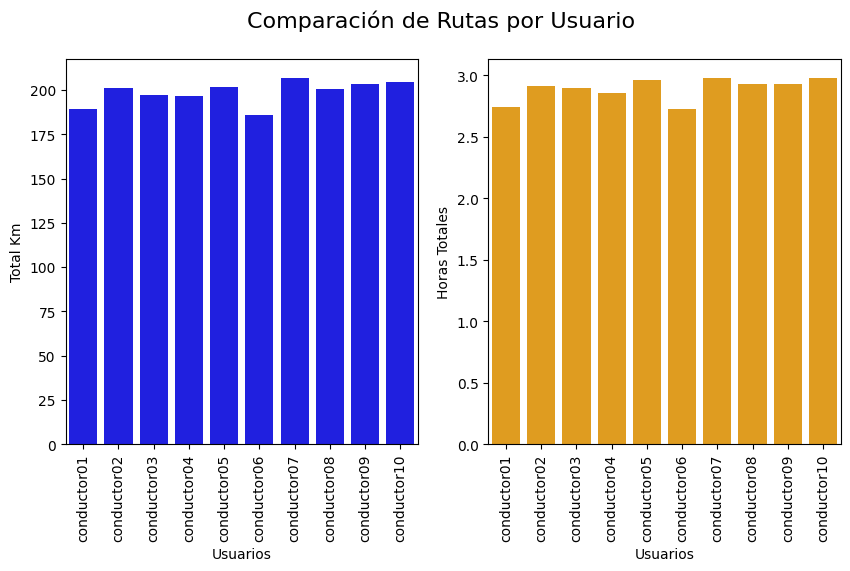

In [349]:
# Plots de Rutas solo de los  5 usuarios
rutas_users['num_conductor'] = rutas_users['usuario'].str.extract('(\d+)').astype(int)
rutas_users_ordenado = rutas_users.sort_values('num_conductor')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=rutas_users_ordenado, x='usuario', y='total_km', color='blue', ax=axes[0], errorbar=None)
axes[0].set_xlabel('Usuarios')
axes[0].set_ylabel('Total Km')
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(data=rutas_users_ordenado, x='usuario', y='horas_totales', color='orange', ax=axes[1], errorbar=None)
axes[1].set_xlabel('Usuarios')
axes[1].set_ylabel('Horas Totales')
axes[1].tick_params(axis='x', rotation=90)


plt.suptitle('Comparación de Rutas por Usuario', fontsize=16);
plt.savefig(path + "graficas_rutas.tiff", format='tiff', dpi=300)

In [173]:
kmruta = rutas['total_km']
kmruta

0      151.203
1      265.391
2      272.005
3      230.309
4      213.039
        ...   
495    213.836
496    195.440
497    178.190
498    217.017
499    142.842
Name: total_km, Length: 500, dtype: float64

# Información por ticket

In [255]:
tickets = pd.read_csv(path + "tickets_combustible_euskadi_2022-2025.csv")
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,Litros,Importe,Latitud,Longitud,id_ES
0,02/03/2023 0:00:00,Gasoleo A,1.639080,"(43.278472, -1.98425)",Gasoleo A,6,60,98.344803,43.278472,-1.984250,296.0
1,16/05/2024 0:00:00,Gasolina 95 E5 Premium,1.629000,"(43.316139, -1.905194)",Gasolina 95 E5 Premium,10,1280,2085.120000,43.316139,-1.905194,67.0
2,23/06/2022 0:00:00,Gas Natural Licuado,1.761606,"(43.250667, -2.889028)",Gas Natural Licuado,4,1010,1779.222297,43.250667,-2.889028,186.0
3,21/02/2023 0:00:00,Gases licuados del petróleo,1.639080,"(43.340861, -1.756528)",Gases licuados del petróleo,5,580,950.666432,43.340861,-1.756528,332.0
4,30/01/2022 0:00:00,Gasoleo A,1.789000,"(43.0655, -2.711167)",Gasoleo A,6,1090,1950.010000,43.065500,-2.711167,312.0
...,...,...,...,...,...,...,...,...,...,...,...
366741,27/10/2024 0:00:00,Gasolina 95 E5 Premium,1.269000,"(43.284889, -2.264111)",Gasolina 95 E5 Premium,10,350,444.150000,43.284889,-2.264111,340.0
366742,25/10/2022 0:00:00,Gas Natural Licuado,1.639080,"(42.871806, -2.675944)",Gas Natural Licuado,4,170,278.643609,42.871806,-2.675944,316.0
366743,13/05/2022 0:00:00,Gasoleo B,1.356982,"(43.362194, -3.100528)",Gasoleo B,7,760,1031.306207,43.362194,-3.100528,238.0
366744,17/07/2022 0:00:00,Gasolina 95 E5 Premium,1.479000,"(43.087111, -2.312889)",Gasolina 95 E5 Premium,10,1010,1493.790000,43.087111,-2.312889,70.0


In [256]:
#La columna Fecha la paso a formato datetime
tickets['Fecha'] = pd.to_datetime(tickets['Fecha'], format='%d/%m/%Y %H:%M:%S')

#Creo las columnas de año, mes y dia
tickets['Año'] = tickets['Fecha'].dt.year
tickets['Mes'] = tickets['Fecha'].dt.month
tickets['Día'] = tickets['Fecha'].dt.day

In [259]:
#Añadimos de rutas las columnas de total_km, matriculas y user_label
tickets['total_km'] = random.choices(rutas_users_ordenado['total_km'].tolist(), k=len(tickets))
tickets['matricula'] = random.choices(rutas_users_ordenado['matricula'].tolist(), k=len(tickets))
tickets['usuario'] = random.choices(rutas_users_ordenado['usuario'].tolist(), k=len(tickets))

In [260]:
tickets

,Fecha,TipoCarburante,Precio por Litro,Coordenadas,nombre_carburante,id_carburante,Litros,Importe,Latitud,Longitud,id_ES,Año,Mes,Día,total_km,matricula,usuario
0,2023-03-02,Gasoleo A,1.639080,"(43.278472, -1.98425)",Gasoleo A,6,60,98.344803,43.278472,-1.984250,296.0,2023,3,2,178.934,0357 AAA,conductor08
1,2024-05-16,Gasolina 95 E5 Premium,1.629000,"(43.316139, -1.905194)",Gasolina 95 E5 Premium,10,1280,2085.120000,43.316139,-1.905194,67.0,2024,5,16,225.000,0364 AAA,conductor03
2,2022-06-23,Gas Natural Licuado,1.761606,"(43.250667, -2.889028)",Gas Natural Licuado,4,1010,1779.222297,43.250667,-2.889028,186.0,2022,6,23,207.899,0080 AAA,conductor10
3,2023-02-21,Gases licuados del petróleo,1.639080,"(43.340861, -1.756528)",Gases licuados del petróleo,5,580,950.666432,43.340861,-1.756528,332.0,2023,2,21,221.908,0008 AAA,conductor07
4,2022-01-30,Gasoleo A,1.789000,"(43.0655, -2.711167)",Gasoleo A,6,1090,1950.010000,43.065500,-2.711167,312.0,2022,1,30,178.934,0165 AAA,conductor02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366741,2024-10-27,Gasolina 95 E5 Premium,1.269000,"(43.284889, -2.264111)",Gasolina 95 E5 Premium,10,350,444.150000,43.284889,-2.264111,340.0,2024,10,27,223.175,0491 AAA,conductor04
366742,2022-10-25,Gas Natural Licuado,1.639080,"(42.871806, -2.675944)",Gas Natural Licuado,4,170,278.643609,42.871806,-2.675944,316.0,2022,10,25,232.114,0242 AAA,conductor07
366743,2022-05-13,Gasoleo B,1.356982,"(43.362194, -3.100528)",Gasoleo B,7,760,1031.306207,43.362194,-3.100528,238.0,2022,5,13,280.986,0191 AAA,conductor08
366744,2022-07-17,Gasolina 95 E5 Premium,1.479000,"(43.087111, -2.312889)",Gasolina 95 E5 Premium,10,1010,1493.790000,43.087111,-2.312889,70.0,2022,7,17,244.070,0335 AAA,conductor03


In [261]:
flotavehiculos = pd.read_csv(path + "df_vehiculos_procesado_kw.csv", sep=',', decimal=',', encoding='utf-8')
flotavehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0
1,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,19.0,19.0,Autonomía extendida,NaN,NaN
2,0003 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 N-CON...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
3,0004 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA 5P,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
4,0005 AAA,Nissan X-Trail e-POWER 152kW (204CV) 4x2 TEKNA...,C,7.1,7.5,198.7,207.7,Autonomía extendida,152.0,152.0
...,...,...,...,...,...,...,...,...,...,...
15780,2191 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Core, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
15781,2192 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Plus, AWD,...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
15782,2193 AAC,"Volvo XC90 Recharge Plug-in Hybrid, Ultimate, ...",A,1.2,1.5,28.0,34.0,Híbridos enchufables,NaN,NaN
15783,2194 AAC,"Volvo XC90 Recharge, AWD, Inscription, Inscrip...",A,3.3,2.5,57.0,75.7,Híbridos enchufables,NaN,NaN


In [262]:
mergetickets_vehiculos = pd.merge(flotavehiculos, tickets, left_on='Matricula', right_on='matricula', how='inner')
mergetickets_vehiculos.head()

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo,...,Importe,Latitud,Longitud,id_ES,Año,Mes,Día,total_km,matricula,usuario
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1737.424859,43.280111,-2.852861,213.0,2024,2,1,205.784,0000 AAA,conductor07
1,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1770.206460,43.176444,-2.312056,80.0,2022,6,27,189.350,0000 AAA,conductor05
2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1966.910842,43.185778,-2.671556,7.0,2024,7,17,154.029,0000 AAA,conductor02
3,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1979.970000,43.063333,-2.476111,219.0,2024,11,3,184.535,0000 AAA,conductor03
4,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,17.090000,43.337278,-1.768694,227.0,2023,7,17,278.825,0000 AAA,conductor08


In [263]:
columns = ['Coordenadas', 'nombre_carburante', 'matricula']
mergetickets_vehiculos.drop(columns= columns, inplace=True)


In [264]:
mergetickets_vehiculos

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo,...,Litros,Importe,Latitud,Longitud,id_ES,Año,Mes,Día,total_km,usuario
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1060,1737.424859,43.280111,-2.852861,213.0,2024,2,1,205.784,conductor07
1,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1080,1770.206460,43.176444,-2.312056,80.0,2022,6,27,189.350,conductor05
2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1400,1966.910842,43.185778,-2.671556,7.0,2024,7,17,154.029,conductor02
3,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,930,1979.970000,43.063333,-2.476111,219.0,2024,11,3,184.535,conductor03
4,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,10,17.090000,43.337278,-1.768694,227.0,2023,7,17,278.825,conductor08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,150,279.575718,43.337500,-1.766167,352.0,2022,12,3,163.703,conductor10
9526,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,1170,2011.230000,43.350472,-3.073861,304.0,2023,2,16,135.304,conductor01
9527,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,420,590.073253,43.277667,-2.000944,96.0,2024,1,11,181.549,conductor08
9528,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,1080,1986.120000,43.327306,-1.870861,280.0,2024,2,24,147.347,conductor08


In [265]:
mergetickets_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Matricula                 9530 non-null   object        
 1   Modelo                    9530 non-null   object        
 2   Clasificación Energética  9530 non-null   object        
 3    Consumo MIN              9530 non-null   object        
 4    Consumo MAX              9530 non-null   object        
 5    Emisiones MIN (gCO2/km)  9530 non-null   object        
 6    Emisiones MAX (gCO2/km)  9530 non-null   object        
 7    Motorización             9530 non-null   object        
 8   kw_minimo                 8802 non-null   object        
 9   kw_maximo                 8802 non-null   object        
 10  Fecha                     9530 non-null   datetime64[ns]
 11  TipoCarburante            9530 non-null   object        
 12  Precio por Litro    

In [266]:
mergetickets_vehiculos.columns

Index(['Matricula', 'Modelo', 'Clasificación Energética', ' Consumo MIN',
       ' Consumo MAX', ' Emisiones MIN (gCO2/km)', ' Emisiones MAX (gCO2/km)',
       ' Motorización', 'kw_minimo', 'kw_maximo', 'Fecha', 'TipoCarburante',
       'Precio por Litro', 'id_carburante', 'Litros', 'Importe', 'Latitud',
       'Longitud', 'id_ES', 'Año', 'Mes', 'Día', 'total_km', 'usuario'],
      dtype='object')

In [267]:
columnas_excluir = ['Matricula', 'Modelo', 'Clasificación Energética',' Motorización', 'Fecha', 'TipoCarburante', 
                     'id_carburante', 'id_ES', 'Año', 'Mes', 'Día', 'total_km', 'usuario']

for col in mergetickets_vehiculos.columns:
    if mergetickets_vehiculos[col].dtype == 'object' and col not in columnas_excluir:
        # to_numeric es más seguro porque maneja errores automáticamente
        mergetickets_vehiculos[col] = pd.to_numeric(mergetickets_vehiculos[col], errors='coerce')

mergetickets_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Matricula                 9530 non-null   object        
 1   Modelo                    9530 non-null   object        
 2   Clasificación Energética  9530 non-null   object        
 3    Consumo MIN              9530 non-null   float64       
 4    Consumo MAX              9530 non-null   float64       
 5    Emisiones MIN (gCO2/km)  9530 non-null   float64       
 6    Emisiones MAX (gCO2/km)  9530 non-null   float64       
 7    Motorización             9530 non-null   object        
 8   kw_minimo                 8802 non-null   float64       
 9   kw_maximo                 8802 non-null   float64       
 10  Fecha                     9530 non-null   datetime64[ns]
 11  TipoCarburante            9530 non-null   object        
 12  Precio por Litro    

In [268]:
#Gasto en litros e importe por tipo de carburante y año
gasto_carburante = mergetickets_vehiculos.groupby([ 'Año','Mes', 'TipoCarburante', 'total_km', 'Matricula', 'usuario']).agg({'Litros': 'sum', 'Importe': 'sum', ' Consumo MIN': 'mean', ' Consumo MAX': 'mean'}).reset_index()
gasto_carburante

,Año,Mes,TipoCarburante,total_km,Matricula,usuario,Litros,Importe,Consumo MIN,Consumo MAX
0,2022,1,Biodiesel,96.464,0013 AAA,conductor06,1050,1983.450000,7.1,7.5
1,2022,1,Biodiesel,111.031,0013 AAA,conductor06,1010,1746.290000,7.1,7.5
2,2022,1,Biodiesel,134.559,0009 AAA,conductor08,370,680.430000,7.1,7.5
3,2022,1,Biodiesel,134.559,0013 AAA,conductor09,1290,1859.747048,7.1,7.5
4,2022,1,Biodiesel,143.524,0005 AAA,conductor10,550,906.950000,7.1,7.5
...,...,...,...,...,...,...,...,...,...,...
9522,2024,12,Gasolina 98 E5,236.964,0011 AAA,conductor02,760,1002.440000,7.1,7.5
9523,2024,12,Gasolina 98 E5,250.772,0012 AAA,conductor01,570,773.479656,7.1,7.5
9524,2024,12,Gasolina 98 E5,272.005,0005 AAA,conductor09,1360,1845.495319,7.1,7.5
9525,2024,12,Gasolina 98 E5,310.682,0006 AAA,conductor06,1110,1988.912135,7.1,7.5


In [270]:
gasto_carburante['mean_consumo'] = (gasto_carburante[' Consumo MIN'] + gasto_carburante[' Consumo MAX']) / 2
gasto_carburante.drop(columns=[' Consumo MIN', ' Consumo MAX'], inplace=True)
gasto_carburante

,Año,Mes,TipoCarburante,total_km,Matricula,usuario,Litros,Importe,mean_consumo
0,2022,1,Biodiesel,96.464,0013 AAA,conductor06,1050,1983.450000,7.3
1,2022,1,Biodiesel,111.031,0013 AAA,conductor06,1010,1746.290000,7.3
2,2022,1,Biodiesel,134.559,0009 AAA,conductor08,370,680.430000,7.3
3,2022,1,Biodiesel,134.559,0013 AAA,conductor09,1290,1859.747048,7.3
4,2022,1,Biodiesel,143.524,0005 AAA,conductor10,550,906.950000,7.3
...,...,...,...,...,...,...,...,...,...
9522,2024,12,Gasolina 98 E5,236.964,0011 AAA,conductor02,760,1002.440000,7.3
9523,2024,12,Gasolina 98 E5,250.772,0012 AAA,conductor01,570,773.479656,7.3
9524,2024,12,Gasolina 98 E5,272.005,0005 AAA,conductor09,1360,1845.495319,7.3
9525,2024,12,Gasolina 98 E5,310.682,0006 AAA,conductor06,1110,1988.912135,7.3


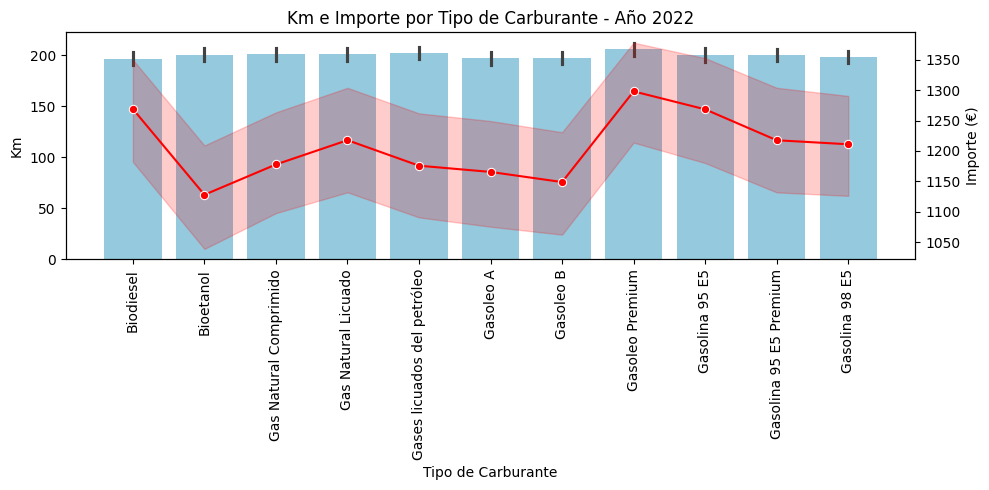

<Figure size 640x480 with 0 Axes>

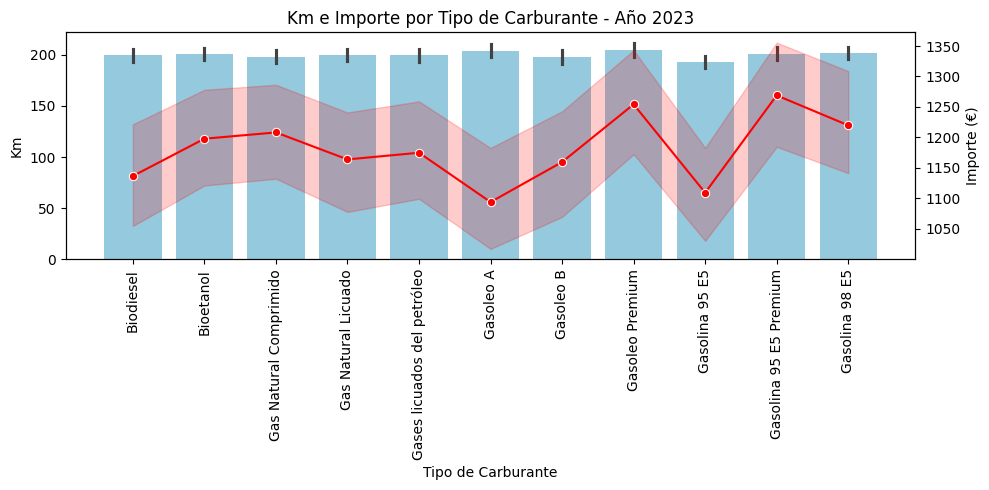

<Figure size 640x480 with 0 Axes>

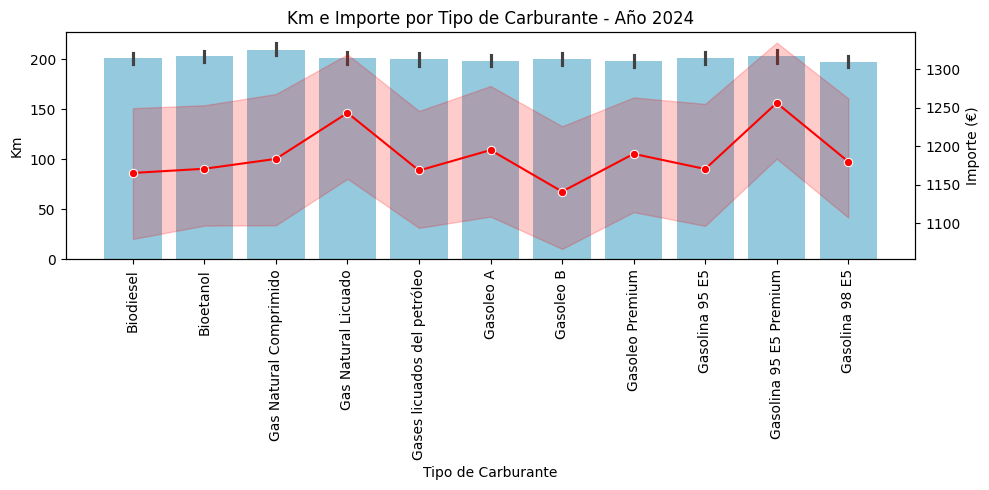

<Figure size 640x480 with 0 Axes>

In [271]:
# Gráfico combinado de km (barras) e importe (línea) por tipo de carburante y año
for año in gasto_carburante['Año'].unique():
    df_año = gasto_carburante[gasto_carburante['Año'] == año]
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Barras: Km por tipo de carburante
    sns.barplot(data=df_año, x='TipoCarburante', y='total_km', ax=ax1, color='skyblue')
    ax1.set_ylabel('Km')
    ax1.set_xlabel('Tipo de Carburante')
    ax1.set_title(f'Km e Importe por Tipo de Carburante - Año {año}')
    ax1.tick_params(axis='x', rotation=90)

    # Línea: Importe total por tipo de carburante
    ax2 = ax1.twinx()
    sns.lineplot(data=df_año, x='TipoCarburante', y='Importe', ax=ax2, color='red', marker='o')
    ax2.set_ylabel('Importe (€)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    plt.tight_layout()
    plt.show()
    plt.savefig(path + "graficas_gastocombustible.tiff", format='tiff', dpi=300);

In [272]:
#Grafico del año 2024 los gastos por tipo de carburante, litros e importe
df_2024 = mergetickets_vehiculos[mergetickets_vehiculos['Año'] == 2024]
df_2024

,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),Motorización,kw_minimo,kw_maximo,...,Litros,Importe,Latitud,Longitud,id_ES,Año,Mes,Día,total_km,usuario
0,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1060,1737.424859,43.280111,-2.852861,213.0,2024,2,1,205.784,conductor07
2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,1400,1966.910842,43.185778,-2.671556,7.0,2024,7,17,154.029,conductor02
3,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,930,1979.970000,43.063333,-2.476111,219.0,2024,11,3,184.535,conductor03
7,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,560,912.240000,43.276889,-2.022194,38.0,2024,5,12,221.125,conductor10
9,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,10.0,144.0,Autonomía extendida,20.5,158.0,...,250,237.695016,43.366194,-2.930028,153.0,2024,11,26,250.772,conductor06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9519,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,1420,2128.580000,43.325889,-1.970639,19.0,2024,1,9,268.679,conductor02
9524,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,690,969.406058,42.864667,-2.660222,118.0,2024,11,1,117.193,conductor05
9527,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,420,590.073253,43.277667,-2.000944,96.0,2024,1,11,181.549,conductor08
9528,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,198.7,207.7,Autonomía extendida,158.0,158.0,...,1080,1986.120000,43.327306,-1.870861,280.0,2024,2,24,147.347,conductor08


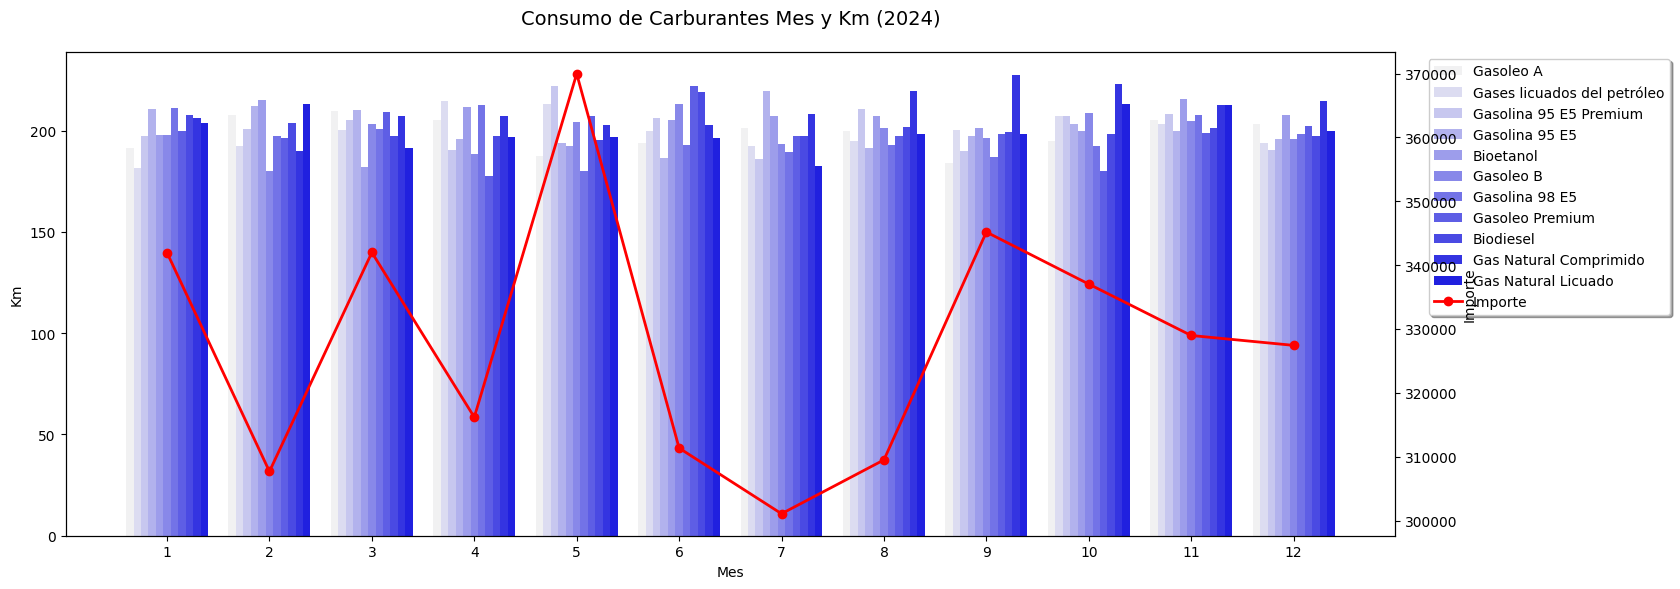

<Figure size 640x480 with 0 Axes>

In [273]:
plt.figure(figsize=(14, 6))

ax1 = plt.gca()
sns.barplot(data=df_2024, x='Mes', y='total_km',hue='TipoCarburante', errorbar=None, palette='light:blue',ax=ax1)


ax2 = ax1.twinx()

#  datos por mes y asegurarse de que incluya todos los meses desde 1
df_importe_mes = df_2024.groupby('Mes', as_index=False)['Importe'].sum()


line_plot = ax2.plot(
    df_importe_mes['Mes'] - 1,  # Ajustar posición para alinear con las barras (índice 0-based)
    df_importe_mes['Importe'], 
    color='red', 
    marker='o',
    linewidth=2,
    markersize=6,
    label='Importe'
)


plt.title('Consumo de Carburantes Mes y Km (2024)', fontsize=14, pad=20)
ax1.set_xlabel('Mes')
ax1.set_ylabel('Km')
ax2.set_ylabel('Importe')


handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()


ax1.get_legend().remove()


ax1.legend(handles1 + handles2, labels1 + labels2, 
          loc='upper left', bbox_to_anchor=(1.02, 1), 
          frameon=True, fancybox=True, shadow=True)


plt.tight_layout()
plt.subplots_adjust(right=1)  #  espacio a la derecha para la leyenda

plt.show()

plt.savefig(path + "graficas_2024gastocombustible.tiff", format='tiff', dpi=300);

# Obtencion del CAE

In [274]:
combustible = pd.read_csv(path + "df_combustible_precios_euskadi_2022-2025.csv")


In [275]:
combustible['Fecha'] = pd.to_datetime(combustible['Fecha'], format='%d/%m/%Y %H:%M:%S')

#Creo las columnas de año, mes y dia
combustible['Año'] = combustible['Fecha'].dt.year
combustible['Mes'] = combustible['Fecha'].dt.month
combustible['Día'] = combustible['Fecha'].dt.day

In [276]:
combustible_group = combustible.groupby(['Año', 'Mes', 'nombre_carburante']).agg({ 'precio': 'mean', 'energia_kWh': 'mean'}).reset_index()
combustible_group

,Año,Mes,nombre_carburante,precio,energia_kWh
0,2022,1,Biodiesel,1.786852,9.20
1,2022,1,Bioetanol,1.639070,5.90
2,2022,1,Gas Natural Comprimido,1.449318,13.10
3,2022,1,Gas Natural Licuado,1.411236,13.90
4,2022,1,Gases licuados del petróleo,0.938963,6.90
...,...,...,...,...,...
391,2024,12,Gasoleo B,1.331939,10.20
392,2024,12,Gasoleo Premium,1.648500,10.20
393,2024,12,Gasolina 95 E5,1.555840,9.25
394,2024,12,Gasolina 95 E5 Premium,1.749829,9.25


In [297]:
mergedf = pd.merge(combustible_group, mergetickets_vehiculos, left_on=['Año', 'Mes', 'nombre_carburante'],
                   right_on=['Año', 'Mes', 'TipoCarburante'], how="inner")

In [298]:
mergedf

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,...,Precio por Litro,id_carburante,Litros,Importe,Latitud,Longitud,id_ES,Día,total_km,usuario
0,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,1.863838,1,930,1733.369452,42.849028,-2.693722,204.0,1,154.029,conductor05
1,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,1.791813,1,380,680.888839,43.204333,-3.047306,188.0,18,198.946,conductor10
2,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,1.863838,1,580,1081.026110,43.305833,-3.045000,214.0,20,293.545,conductor10
3,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,1.761606,1,630,1109.811928,43.219167,-2.408750,99.0,21,254.468,conductor02
4,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,0.950780,1,640,608.499240,43.292806,-3.017750,139.0,14,222.064,conductor07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,2024,12,Gasolina 98 E5,1.782658,9.25,0011 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,1.404936,11,790,1109.899689,43.307222,-3.078528,3.0,17,200.016,conductor04
9526,2024,12,Gasolina 98 E5,1.782658,9.25,0012 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,1.356982,11,570,773.479656,43.177167,-2.055528,56.0,24,250.772,conductor01
9527,2024,12,Gasolina 98 E5,1.782658,9.25,0012 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,1.639080,11,1340,2196.367274,43.045278,-2.194806,121.0,4,181.617,conductor10
9528,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,1.599000,11,1220,1950.780000,42.878556,-2.518167,87.0,11,196.515,conductor04


In [299]:
mergedf['consumovehiculomean'] = (mergedf[' Consumo MIN'] + mergedf[' Consumo MIN'] / 2)  * mergedf['total_km']
mergedf

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Consumo MIN,Consumo MAX,...,id_carburante,Litros,Importe,Latitud,Longitud,id_ES,Día,total_km,usuario,consumovehiculomean
0,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,0.4,6.4,...,1,930,1733.369452,42.849028,-2.693722,204.0,1,154.029,conductor05,92.41740
1,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,1,380,680.888839,43.204333,-3.047306,188.0,18,198.946,conductor10,268.57710
2,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,1,580,1081.026110,43.305833,-3.045000,214.0,20,293.545,conductor10,396.28575
3,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,1,630,1109.811928,43.219167,-2.408750,99.0,21,254.468,conductor02,343.53180
4,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,0.9,0.9,...,1,640,608.499240,43.292806,-3.017750,139.0,14,222.064,conductor07,299.78640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,2024,12,Gasolina 98 E5,1.782658,9.25,0011 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,11,790,1109.899689,43.307222,-3.078528,3.0,17,200.016,conductor04,2130.17040
9526,2024,12,Gasolina 98 E5,1.782658,9.25,0012 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,11,570,773.479656,43.177167,-2.055528,56.0,24,250.772,conductor01,2670.72180
9527,2024,12,Gasolina 98 E5,1.782658,9.25,0012 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,11,1340,2196.367274,43.045278,-2.194806,121.0,4,181.617,conductor10,1934.22105
9528,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,7.1,7.5,...,11,1220,1950.780000,42.878556,-2.518167,87.0,11,196.515,conductor04,2092.88475


In [300]:
mergedf = mergedf.drop(columns=['TipoCarburante', ' Consumo MIN', ' Consumo MAX'])

In [292]:
mergedf

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),...,id_carburante,Litros,Importe,Latitud,Longitud,id_ES,Día,total_km,usuario,consumovehiculomean
0,2022,1,Biodiesel,1.786852,9.20,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,1,930,1733.369452,42.849028,-2.693722,204.0,1,154.029,conductor05,92.41740
1,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,1,380,680.888839,43.204333,-3.047306,188.0,18,198.946,conductor10,268.57710
2,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,1,580,1081.026110,43.305833,-3.045000,214.0,20,293.545,conductor10,396.28575
3,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,1,630,1109.811928,43.219167,-2.408750,99.0,21,254.468,conductor02,343.53180
4,2022,1,Biodiesel,1.786852,9.20,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,1,640,608.499240,43.292806,-3.017750,139.0,14,222.064,conductor07,299.78640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,2024,12,Gasolina 98 E5,1.782658,9.25,0011 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,198.7,207.7,...,11,790,1109.899689,43.307222,-3.078528,3.0,17,200.016,conductor04,2130.17040
9526,2024,12,Gasolina 98 E5,1.782658,9.25,0012 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,198.7,207.7,...,11,570,773.479656,43.177167,-2.055528,56.0,24,250.772,conductor01,2670.72180
9527,2024,12,Gasolina 98 E5,1.782658,9.25,0012 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,198.7,207.7,...,11,1340,2196.367274,43.045278,-2.194806,121.0,4,181.617,conductor10,1934.22105
9528,2024,12,Gasolina 98 E5,1.782658,9.25,0013 AAA,Nissan X-Trail e-POWER 158kW (213CV) 4x4 e-4OR...,C,198.7,207.7,...,11,1220,1950.780000,42.878556,-2.518167,87.0,11,196.515,conductor04,2092.88475


In [317]:
mergedf.columns

Index(['Año', 'Mes', 'nombre_carburante', 'precio', 'energia_kWh', 'Matricula',
       'Modelo', 'Clasificación Energética', ' Emisiones MIN (gCO2/km)',
       ' Emisiones MAX (gCO2/km)', ' Motorización', 'kw_minimo', 'kw_maximo',
       'Fecha', 'Precio por Litro', 'id_carburante', 'Litros', 'Importe',
       'Latitud', 'Longitud', 'id_ES', 'Día', 'total_km', 'usuario',
       'consumovehiculomean', 'coste_energetico_vehiculo'],
      dtype='object')

In [318]:
mergedf['coste_energetico_vehiculo'] = mergedf['consumovehiculomean'] * mergedf['energia_kWh']
mergedf['emisiones_vehiculo'] = (mergedf[' Emisiones MIN (gCO2/km)'] + mergedf[' Emisiones MAX (gCO2/km)'] /2)
mergedf.head()

,Año,Mes,nombre_carburante,precio,energia_kWh,Matricula,Modelo,Clasificación Energética,Emisiones MIN (gCO2/km),Emisiones MAX (gCO2/km),...,Importe,Latitud,Longitud,id_ES,Día,total_km,usuario,consumovehiculomean,coste_energetico_vehiculo,emisiones_vehiculo
0,2022,1,Biodiesel,1.786852,9.2,0000 AAA,"Leapmotor C10 REEV 158kW-20,5kWh",A,10.0,144.0,...,1733.369452,42.849028,-2.693722,204.0,1,154.029,conductor05,92.41740,850.24008,82.0
1,2022,1,Biodiesel,1.786852,9.2,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,680.888839,43.204333,-3.047306,188.0,18,198.946,conductor10,268.57710,2470.90932,28.5
2,2022,1,Biodiesel,1.786852,9.2,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,1081.026110,43.305833,-3.045000,214.0,20,293.545,conductor10,396.28575,3645.82890,28.5
3,2022,1,Biodiesel,1.786852,9.2,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,1109.811928,43.219167,-2.408750,99.0,21,254.468,conductor02,343.53180,3160.49256,28.5
4,2022,1,Biodiesel,1.786852,9.2,0001 AAA,"LEVC TX Icon, Vista",A,19.0,19.0,...,608.499240,43.292806,-3.017750,139.0,14,222.064,conductor07,299.78640,2758.03488,28.5


In [319]:
coste_energetico_anual= mergedf.groupby(['Año', 'nombre_carburante']).agg(km_medio=('total_km', 'mean'),coste_energetico_anual=('coste_energetico_vehiculo', 'sum'))
emisiones_anual = mergedf.groupby(['Año', 'nombre_carburante']).agg(km_medio=('total_km', 'mean'),emisiones_anual=('emisiones_vehiculo', 'sum'))


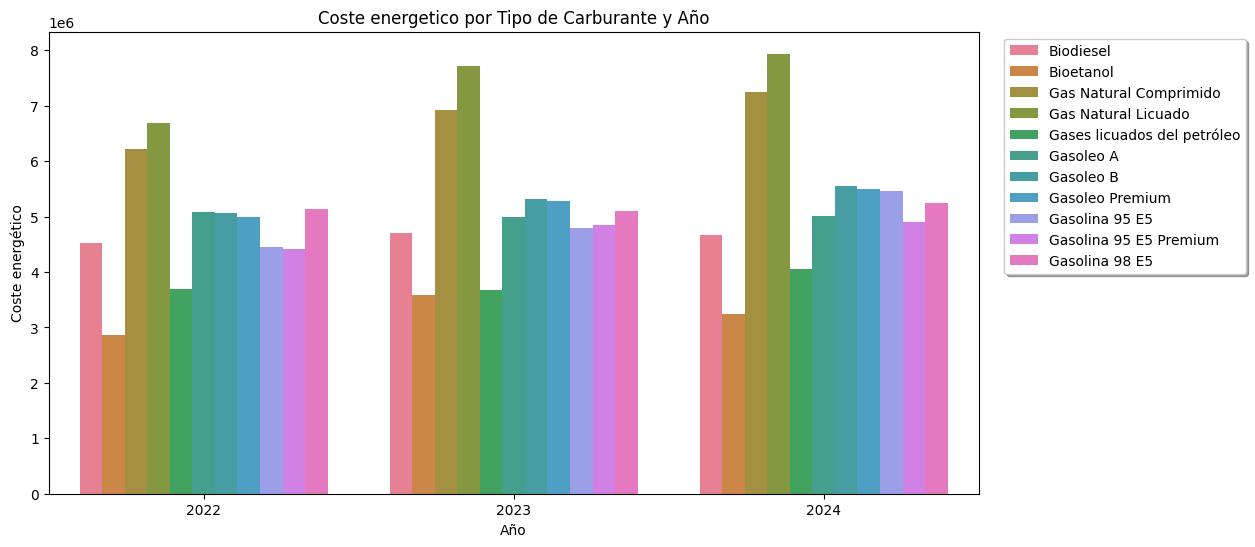

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot del coste energetico por tipo de carburante y año
plt.figure(figsize=(12, 6))
sns.barplot(data=coste_energetico_anual, x='Año', y='coste_energetico_anual', hue='nombre_carburante')
plt.title('Coste energetico por Tipo de Carburante y Año')
plt.xlabel('Año')
plt.ylabel('Coste energético')
plt.legend(title='Tipo de Carburante')
plt.legend( 
          loc='upper left', bbox_to_anchor=(1.02, 1), 
          frameon=True, fancybox=True, shadow=True)
plt.show()
plt.savefig(path + "graficas_gastoCAE.tiff", format='tiff', dpi=300);

In [306]:
coste_energetico_anual

km_medio  coste_energetico_anual
Año  nombre_carburante                                              
2022 Biodiesel                    196.410864            4.528998e+06
     Bioetanol                    200.508000            2.870074e+06
     Gas Natural Comprimido       200.988122            6.226683e+06
     Gas Natural Licuado          200.730879            6.688171e+06
     Gases licuados del petróleo  202.477240            3.689496e+06
     Gasoleo A                    197.096014            5.077954e+06
     Gasoleo B                    197.337993            5.058497e+06
     Gasoleo Premium              205.715674            4.998451e+06
     Gasolina 95 E5               200.432708            4.451985e+06
     Gasolina 95 E5 Premium       200.089131            4.405930e+06
     Gasolina 98 E5               198.541157            5.132829e+06
2023 Biodiesel                    199.622662            4.698985e+06
     Bioetanol                    200.790348            3.579517e+06
     Gas Natural Comprimido       197.699532            6.922786e+06
     Gas Natural Licuado          199.425766            7.708838e+06
     Gases licuados del petróleo  199.585952            3.665891e+06
     Gasoleo A                    203.993625            4.998735e+06
     Gasoleo B                    197.496074            5.319941e+06
     Gasoleo Premium              204.300205            5.283101e+06
     Gasolina 95 E5               193.411262            4.796350e+06
     Gasolina 95 E5 Premium       200.978318            4.838329e+06
     Gasolina 98 E5               201.731605            5.103877e+06
2024 Biodiesel                    200.967947            4.671523e+06
     Bioetanol                    202.620125            3.236080e+06
     Gas Natural Comprimido       209.448833            7.253869e+06
     Gas Natural Licuado          200.659631            7.936909e+06
     Gases licuados del petróleo  199.819972            4.049639e+06
     Gasoleo A                    198.209162            5.010389e+06
     Gasoleo B                    199.963801            5.553846e+06
     Gasoleo Premium              198.418099            5.499590e+06
     Gasolina 95 E5               200.900822            5.468680e+06
     Gasolina 95 E5 Premium       202.708130            4.899966e+06
     Gasolina 98 E5               197.156248            5.252795e+06

In [309]:
# Carburante mas eficiente por año. Aquel con menor CAE
eficiente_por_año = coste_energetico_anual.loc[coste_energetico_anual.groupby('Año')['coste_energetico_anual'].idxmin()]
eficiente_por_año 

,,km_medio,coste_energetico_anual
Año,nombre_carburante,,
2022,Bioetanol,200.508000,2.870074e+06
2023,Bioetanol,200.790348,3.579517e+06
2024,Bioetanol,202.620125,3.236080e+06


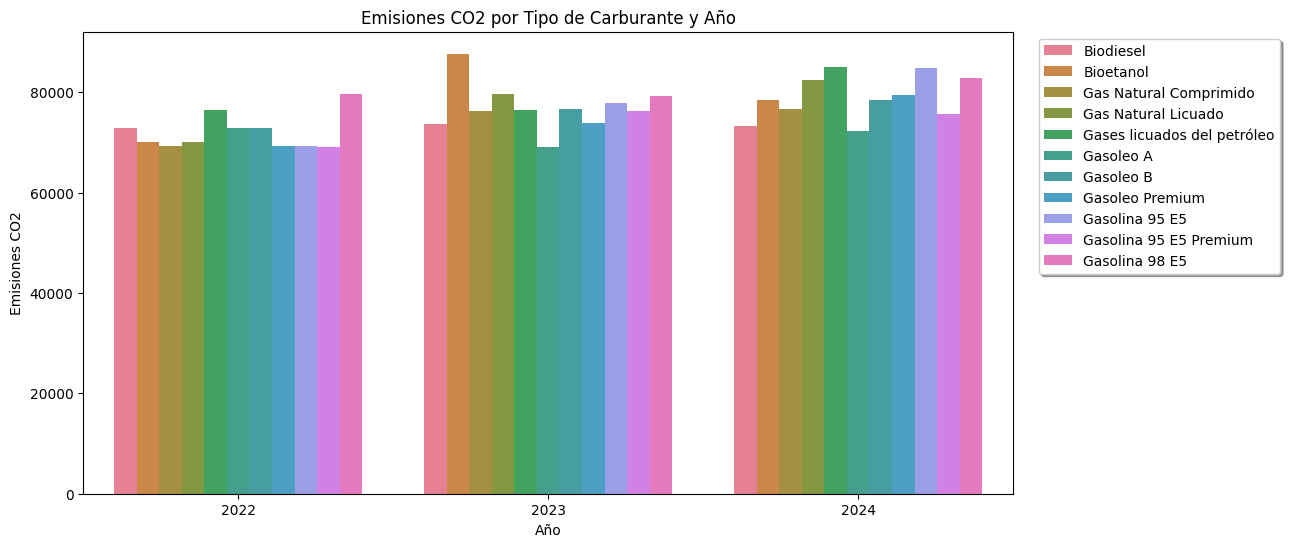

<Figure size 640x480 with 0 Axes>

In [320]:
#Plot emisiones por tipo de carburante y año
plt.figure(figsize=(12, 6))
sns.barplot(data=emisiones_anual, x='Año', y='emisiones_anual', hue='nombre_carburante')
plt.title('Emisiones CO2 por Tipo de Carburante y Año')
plt.xlabel('Año')
plt.ylabel('Emisiones CO2')
plt.legend(title='Tipo de Carburante')
plt.legend( 
          loc='upper left', bbox_to_anchor=(1.02, 1), 
          frameon=True, fancybox=True, shadow=True)
plt.show()
plt.savefig(path + "graficas_emisionesCO2.tiff", format='tiff', dpi=300);

In [343]:
# Crear una nueva columna vacía
coste_energetico_anual['Ahorro'] = None

# Iterar por cada año único en el índice
for año in coste_energetico_anual.index.get_level_values('Año').unique():
    # Obtener el coste energético de Bioetanol para ese año
    bioetanol_coste = coste_energetico_anual.loc[(año, 'Bioetanol'), 'coste_energetico_anual']

    # Iterar por todos los carburantes de ese año
    for carburante in coste_energetico_anual.loc[año].index:
        coste = coste_energetico_anual.loc[(año, carburante), 'coste_energetico_anual']
        ahorro = coste - bioetanol_coste
        coste_energetico_anual.loc[(año, carburante), 'Ahorro'] = ahorro


In [344]:
coste_energetico_anual

km_medio  coste_energetico_anual  \
Año  nombre_carburante                                                 
2022 Biodiesel                    196.410864            4.528998e+06   
     Bioetanol                    200.508000            2.870074e+06   
     Gas Natural Comprimido       200.988122            6.226683e+06   
     Gas Natural Licuado          200.730879            6.688171e+06   
     Gases licuados del petróleo  202.477240            3.689496e+06   
     Gasoleo A                    197.096014            5.077954e+06   
     Gasoleo B                    197.337993            5.058497e+06   
     Gasoleo Premium              205.715674            4.998451e+06   
     Gasolina 95 E5               200.432708            4.451985e+06   
     Gasolina 95 E5 Premium       200.089131            4.405930e+06   
     Gasolina 98 E5               198.541157            5.132829e+06   
2023 Biodiesel                    199.622662            4.698985e+06   
     Bioetanol                    200.790348            3.579517e+06   
     Gas Natural Comprimido       197.699532            6.922786e+06   
     Gas Natural Licuado          199.425766            7.708838e+06   
     Gases licuados del petróleo  199.585952            3.665891e+06   
     Gasoleo A                    203.993625            4.998735e+06   
     Gasoleo B                    197.496074            5.319941e+06   
     Gasoleo Premium              204.300205            5.283101e+06   
     Gasolina 95 E5               193.411262            4.796350e+06   
     Gasolina 95 E5 Premium       200.978318            4.838329e+06   
     Gasolina 98 E5               201.731605            5.103877e+06   
2024 Biodiesel                    200.967947            4.671523e+06   
     Bioetanol                    202.620125            3.236080e+06   
     Gas Natural Comprimido       209.448833            7.253869e+06   
     Gas Natural Licuado          200.659631            7.936909e+06   
     Gases licuados del petróleo  199.819972            4.049639e+06   
     Gasoleo A                    198.209162            5.010389e+06   
     Gasoleo B                    199.963801            5.553846e+06   
     Gasoleo Premium              198.418099            5.499590e+06   
     Gasolina 95 E5               200.900822            5.468680e+06   
     Gasolina 95 E5 Premium       202.708130            4.899966e+06   
     Gasolina 98 E5               197.156248            5.252795e+06   

                                          Ahorro  
Año  nombre_carburante                            
2022 Biodiesel                    1658924.173365  
     Bioetanol                               0.0  
     Gas Natural Comprimido       3356608.583025  
     Gas Natural Licuado            3818096.5929  
     Gases licuados del petróleo    819421.69776  
     Gasoleo A                    2207879.944485  
     Gasoleo B                    2188422.478545  
     Gasoleo Premium              2128376.961465  
     Gasolina 95 E5               1581910.971795  
     Gasolina 95 E5 Premium       1535855.613532  
     Gasolina 98 E5                2262754.93242  
2023 Biodiesel                     1119467.99424  
     Bioetanol                               0.0  
     Gas Natural Comprimido       3343268.641635  
     Gas Natural Licuado           4129320.19992  
     Gases licuados del petróleo     86373.46926  
     Gasoleo A                     1419217.84782  
     Gasoleo B                     1740423.82167  
     Gasoleo Premium               1703583.55143  
     Gasolina 95 E5                1216832.76102  
     Gasolina 95 E5 Premium       1258811.272432  
     Gasolina 98 E5                1524359.76507  
2024 Biodiesel                    1435443.692775  
     Bioetanol                               0.0  
     Gas Natural Comprimido       4017789.545415  
     Gas Natural Licuado          4700829.190335  
     Gases licuados del petróleo   813559.753785  
     Gasoleo A                    17

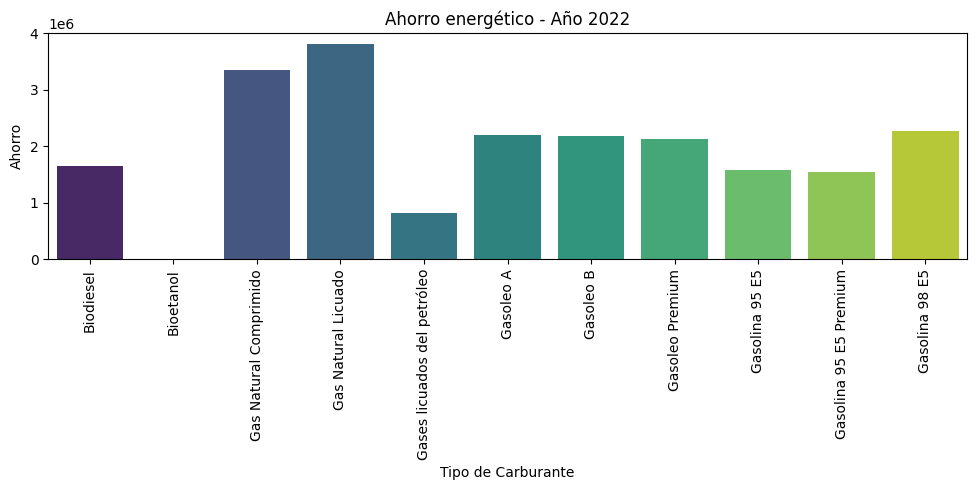

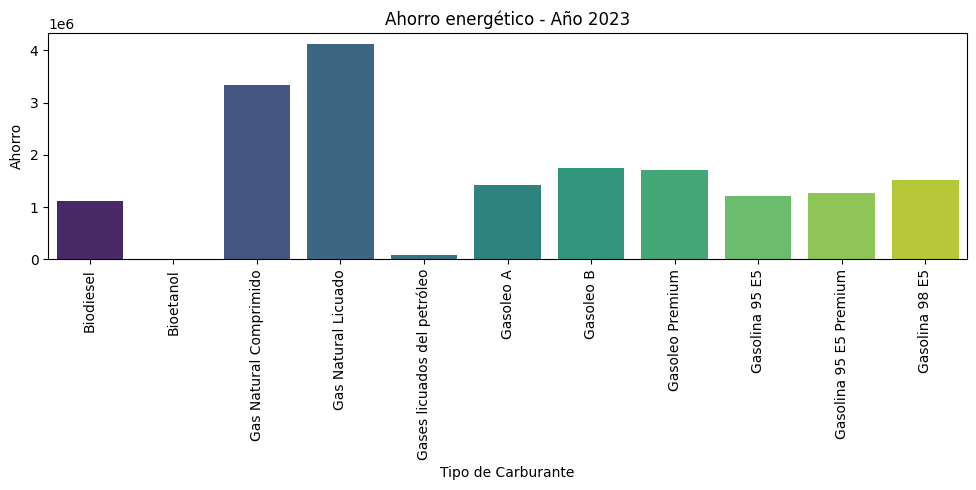

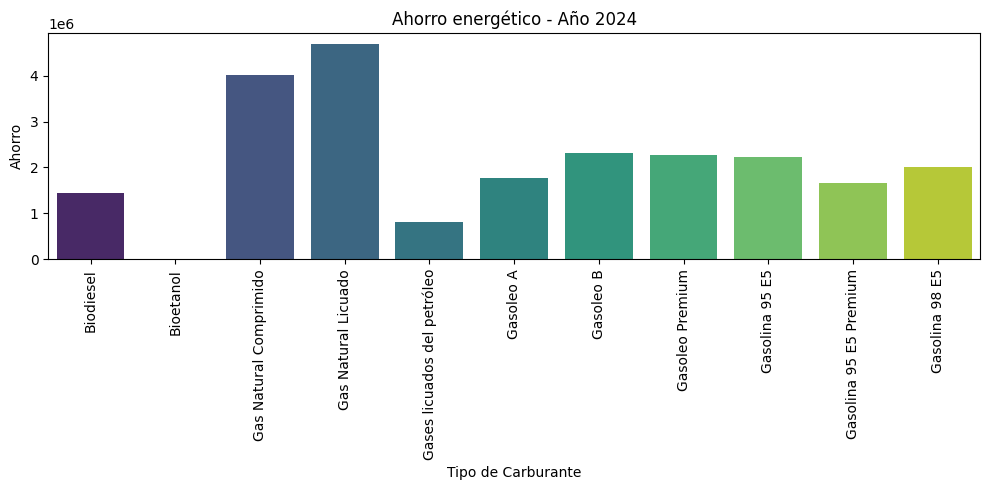

<Figure size 640x480 with 0 Axes>

In [347]:
for año in coste_energetico_anual.index.get_level_values('Año').unique():
    # Filtrar por año usando el índice multinivel
    df_año = coste_energetico_anual.loc[año]

    # Resetear el índice para que 'nombre_carburante' sea una columna
    df_año = df_año.reset_index()

    fig, ax1 = plt.subplots(figsize=(10, 5))
    sns.barplot(data=df_año, x='nombre_carburante', y='Ahorro', hue='nombre_carburante', ax=ax1, palette='viridis', legend=False)

    ax1.set_ylabel('Ahorro')
    ax1.set_xlabel('Tipo de Carburante')
    ax1.set_title(f'Ahorro energético - Año {año}')
    ax1.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()
plt.savefig(path + "graficas_ahorroenergetico.tiff", format='tiff', dpi=300);